# Business Problem

Our business problem is to find out that the promotions given by the
company to the customer and the merchants works or not. Do
customers enjoy their experience? Do merchants see any profit from
these? Now, our problem at hand is to find out how useful and
beneficial these promotions are for merchants as well as for the
customers. We need to find out if the customers actually use these
promotions or discounts offered to them. Customer loyalty score will
give us an idea of how often the users/customers use these
promotions and discounts offered to them. With the data they have
collected our goal is to predict the loyalty score which then will help
the company (Elo) to now focus on the customers which are more
loyal. This would also ensure that Elo reduces the unwanted
marketing campaigns towards the customers who are predicted to
have low customer loyalty. This would ultimately lead to better
customer retention rates.

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
import numpy as np
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from xgboost.sklearn import XGBRegressor
from math import sqrt
from numpy import hstack
from numpy import vstack
from numpy import asarray
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor


In [2]:
#https://www.kaggle.com/frtgnn/elo-eda-lgbm
# this code reduce the memory of dataframe
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

There are multiple files given now we will read and understand each files one by one to look what features are provided and what new features we can invent in order to solve the problem

In [98]:
# reading the train.csv file
train = pd.read_csv('train.csv')
# looking how many rows and columns are there in the file
print(train.shape)

(201917, 6)


In [99]:
# looking the first five rows
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


Description of columns provided for train.csv file - 

card_id: Unique card identifier

first_active_month: 'YYYY-MM', month of first purchase

feature_1: Anonymized card categorical feature

feature_2: Anonymized card categorical feature

feature_3: Anonymized card categorical feature

target: Loyalty numerical score calculated 2 months after historical and evaluation period!

In [3]:
# looking the data tyoes of all columns
train.dtypes

first_active_month     object
card_id                object
feature_1               int64
feature_2               int64
feature_3               int64
target                float64
dtype: object

In [5]:
# Checking how many unique entries a column contains
train.nunique()

first_active_month        75
card_id               201917
feature_1                  5
feature_2                  3
feature_3                  2
target                197110
dtype: int64

By looking at the uniquie values a feature holds we can see that feature_1, feature_2, feature_3 are categorical features

In [6]:
# Checking the correlation between features in train.csv
train.corr()

,feature_1,feature_2,feature_3,target
feature_1,1.000000,-0.130969,0.583092,-0.014251
feature_2,-0.130969,1.000000,0.060925,-0.006242
feature_3,0.583092,0.060925,1.000000,-0.008125
target,-0.014251,-0.006242,-0.008125,1.000000


Using violin plot understanding how given features are helping in predicting loyalty scores

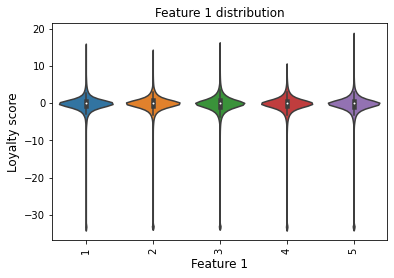

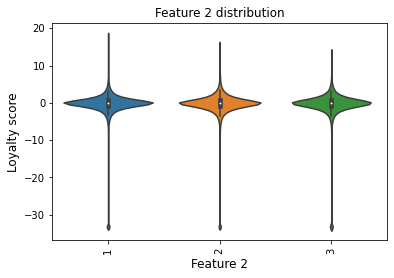

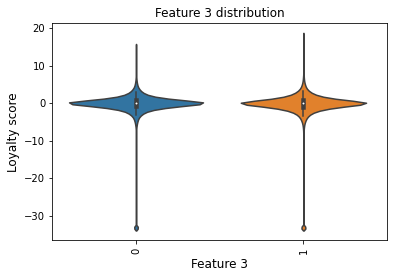

In [7]:
# feature 1
sns.violinplot(x=train['feature_1'], y=train['target'])
plt.xticks(rotation='vertical')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("Feature 1 distribution")
plt.show()

# feature 2

sns.violinplot(x=train['feature_2'], y=train['target'])
plt.xticks(rotation='vertical')
plt.xlabel('Feature 2', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("Feature 2 distribution")
plt.show()

# feature 3
sns.violinplot(x=train['feature_3'], y=train['target'])
plt.xticks(rotation='vertical')
plt.xlabel('Feature 3', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("Feature 3 distribution")
plt.show()


All the plots are looking same it is not possible to see any information which can help us to determine which features is more helpful in pridicting loyalty score

Looking at the distribution of Taeget variable which is Loyalty Score

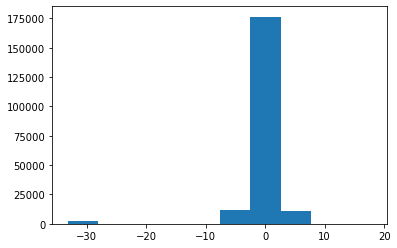

In [8]:
plt.hist(train['target'])
plt.show()

We can see that maximum value lies in the range of -10 to 10 but we can see some outliners with values around -30 and above.
Now lets look the number of points which are having loyalty score less than -10

In [9]:
(train['target'] < -10).sum()

2264

Here we can see out of 201917 total points only 2264 are outliners which are very less nearly a little over 1% of all the data points

We are checking if we have any null values in our train.csv file and we found are none null values

In [10]:
train.isnull().sum()

first_active_month    0
card_id               0
feature_1             0
feature_2             0
feature_3             0
target                0
dtype: int64

Plotting the histogram for every featurs in the train file

C:\Users\krishna\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\krishna\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\krishna\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\krishna\Anaconda3\lib\site-packages\pandas\plottin

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD79860C48>,
      dtype=object)

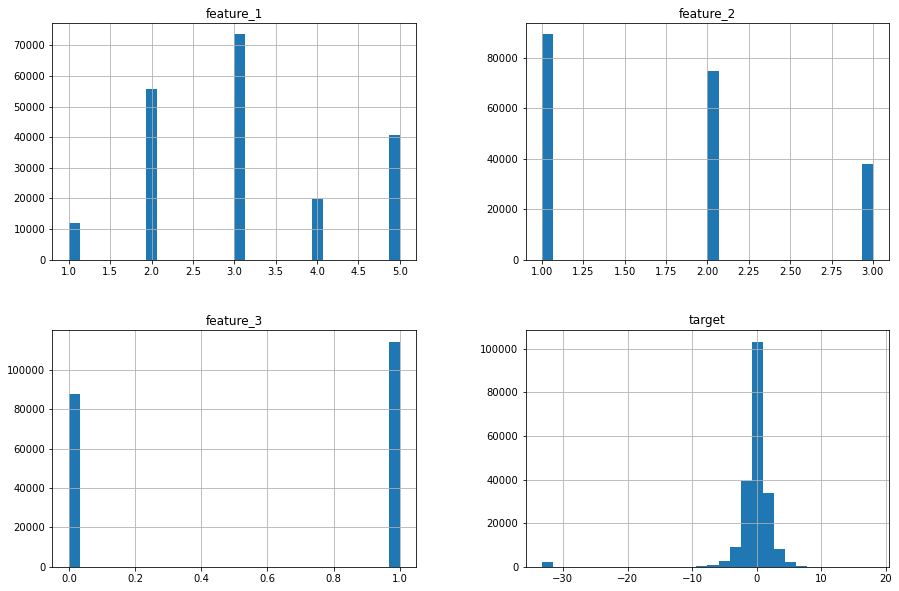

In [11]:
train.hist(bins=30, figsize=(15, 10))

From the plot we can see the distribution of values of categorical features which occurs maximum time and we can see that for feature_1 we have 5 values and the value 3 occures for maximum times, for feature_2 we have 3 values and the value 1 occures for maximum times, for feature_3 we have 2 values and the value 1 occures for maximum times  

In [100]:
# converting object type to date type
train['first_active_month'] = pd.to_datetime(train['first_active_month']) 

We are provided with a date column lets look the count of values over the years

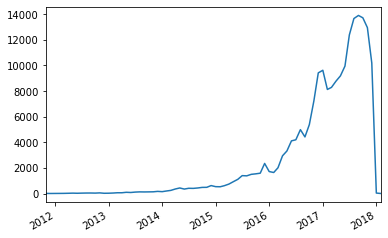

In [9]:
train['first_active_month'].value_counts().plot()

By this plot we can see that in the later years there is are more purchases but as the given data for year 2018 is only for 2 months are can see the line in graphs dips down close to 0 as it only has only 2 months of counts

We are creating some featurs based on date featur such as year, month, day_of_week, day_of_year, week of the year and the time (i.e., diffrence between number of days from 1st feb of 2018 columns to the date purchasing was done) and calling it elapsed_time

In [101]:
train['year'] = train['first_active_month'].dt.year
train['month'] = train['first_active_month'].dt.month
train['dayofweek'] = train['first_active_month'].dt.dayofweek
train['dayofyear'] = train['first_active_month'].dt.dayofyear
train['days_in_month'] = train['first_active_month'].dt.days_in_month
train['week'] = train['first_active_month'].dt.week 
train['elapsed_time'] = (datetime.date(2018, 2, 1) - train['first_active_month'].dt.date).dt.days

In [102]:
train['days_feature1'] = train['elapsed_time'] * train['feature_1']
train['days_feature2'] = train['elapsed_time'] * train['feature_2']
train['days_feature3'] = train['elapsed_time'] * train['feature_3']

train['days_feature1_ratio'] = train['feature_1'] / train['elapsed_time']
train['days_feature2_ratio'] = train['feature_2'] / train['elapsed_time']
train['days_feature3_ratio'] = train['feature_3'] / train['elapsed_time']

train['feature_sum'] = train['feature_1'] + train['feature_2'] + train['feature_3']
train['feature_mean'] = train['feature_sum']/3
train['feature_max'] = train[['feature_1', 'feature_2', 'feature_3']].max(axis=1)
train['feature_min'] = train[['feature_1', 'feature_2', 'feature_3']].min(axis=1)
train['feature_var'] = train[['feature_1', 'feature_2', 'feature_3']].std(axis=1)


Printing the 5 values after adding the features

In [103]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,year,month,dayofweek,dayofyear,...,days_feature2,days_feature3,days_feature1_ratio,days_feature2_ratio,days_feature3_ratio,feature_sum,feature_mean,feature_max,feature_min,feature_var
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283,2017,6,3,152,...,490,245,0.020408,0.008163,0.004082,8,2.666667,5,1,2.081666
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913,2017,1,6,1,...,396,0,0.010101,0.002525,0.000000,5,1.666667,4,0,2.081666
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056,2016,8,0,214,...,1098,0,0.003643,0.003643,0.000000,4,1.333333,2,0,1.154701
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495,2017,9,4,244,...,459,0,0.026144,0.019608,0.000000,7,2.333333,4,0,2.081666
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749,2017,11,2,305,...,276,0,0.010870,0.032609,0.000000,4,1.333333,3,0,1.527525


Again checking the corelation between the features after adding new features

In [13]:
train.corr()

,feature_1,feature_2,feature_3,target,year,month,dayofweek,dayofyear,days_in_month,week,...,days_feature2,days_feature3,days_feature1_ratio,days_feature2_ratio,days_feature3_ratio,feature_sum,feature_mean,feature_max,feature_min,feature_var
feature_1,1.000000,-0.130969,0.583092,-0.014251,-0.115267,-0.012128,-0.012269,-0.011660,0.002659,0.023545,...,-0.009194,0.373576,0.328158,-0.118900,0.319565,0.835593,0.835593,0.965617,0.583092,0.863129
feature_2,-0.130969,1.000000,0.060925,-0.006242,-0.151782,-0.027170,-0.011680,-0.026699,-0.011156,-0.015200,...,0.532591,0.138137,-0.124810,0.374337,-0.053619,0.380058,0.380058,-0.044213,0.060925,-0.111160
feature_3,0.583092,0.060925,1.000000,-0.008125,-0.194084,-0.016784,-0.008997,-0.016465,-0.004336,0.005486,...,0.175726,0.646479,0.151162,-0.084734,0.602655,0.748389,0.748389,0.541164,1.000000,0.185234
target,-0.014251,-0.006242,-0.008125,1.000000,0.040341,0.031512,0.007254,0.031365,0.006889,0.017922,...,-0.039569,-0.036119,0.043513,0.043449,0.027539,-0.015550,-0.015550,-0.015067,-0.008125,-0.015111
year,-0.115267,-0.151782,-0.194084,0.040341,1.000000,-0.119644,0.124323,-0.120962,-0.046169,-0.044076,...,-0.799964,-0.756547,0.439563,0.416985,0.257009,-0.210583,-0.210583,-0.095292,-0.194084,-0.065148
month,-0.012128,-0.027170,-0.016784,0.031512,-0.119644,1.000000,-0.038125,0.999976,0.227296,0.647312,...,-0.168041,-0.121517,0.419520,0.396403,0.265066,-0.026170,-0.026170,-0.002472,-0.016784,0.007714
dayofweek,-0.012269,-0.011680,-0.008997,0.007254,0.124323,-0.038125,1.000000,-0.038354,0.161987,0.220884,...,-0.079902,-0.066867,0.119236,0.109999,0.079489,-0.016865,-0.016865,-0.006147,-0.008997,-0.009919
dayofyear,-0.011660,-0.026699,-0.016465,0.031365,-0.120962,0.999976,-0.038354,1.000000,0.223736,0.649136,...,-0.167018,-0.120877,0.418330,0.395287,0.264379,-0.025522,-0.025522,-0.001984,-0.016465,0.008168
days_in_month,0.002659,-0.011156,-0.004336,0.006889,-0.046169,0.227296,0.161987,0.223736,1.000000,0.376717,...,-0.025086,-0.016756,0.077621,0.068263,0.048736,-0.004478,-0.004478,0.000752,-0.004336,0.005961
week,0.023545,-0.015200,0.005486,0.017922,-0.044076,0.647312,0.220884,0.649136,0.376717,1.000000,...,-0.139066,-0.097237,0.336864,0.313798,0.217504,0.011669,0.011669,0.038007,0.005486,0.040984


Here we can see the dates related features are highly corelated to each other and mainly the feature elapsed_time and year are showing good corelation with our target feature

In [104]:
# printing shape of train file after adding the features
train.shape

(201917, 24)

Reading the Test file here we can see that it is same as the train file but does not include our target feature

In [105]:
test = pd.read_csv('test.csv')
print(test.shape)
test.head()

(123623, 5)


,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04,C_ID_0ab67a22ab,3,3,1
1,2017-01,C_ID_130fd0cbdd,2,3,0
2,2017-08,C_ID_b709037bc5,5,1,1
3,2017-12,C_ID_d27d835a9f,2,1,0
4,2015-12,C_ID_2b5e3df5c2,5,1,1


As we saw we have same features in test as of train so we are applying same feature engineering which we have applied for train dataset and creating same features for test as well

In [106]:
test['first_active_month'] = pd.to_datetime(test['first_active_month'])
test['year'] = test['first_active_month'].dt.year
test['month'] = test['first_active_month'].dt.month
test['dayofweek']= test['first_active_month'].dt.dayofweek
test['dayofyear']= test['first_active_month'].dt.dayofyear
test['days_in_month']= test['first_active_month'].dt.days_in_month
test['week']= test['first_active_month'].dt.week 
test['elapsed_time'] = (datetime.date(2018, 2, 1) - test['first_active_month'].dt.date).dt.days

In [107]:
test['days_feature1'] = test['elapsed_time'] * test['feature_1']
test['days_feature2'] = test['elapsed_time'] * test['feature_2']
test['days_feature3'] = test['elapsed_time'] * test['feature_3']

test['days_feature1_ratio'] = test['feature_1'] / test['elapsed_time']
test['days_feature2_ratio'] = test['feature_2'] / test['elapsed_time']
test['days_feature3_ratio'] = test['feature_3'] / test['elapsed_time']

test['feature_sum'] = test['feature_1'] + test['feature_2'] + test['feature_3']
test['feature_mean'] = test['feature_sum']/3
test['feature_max'] = test[['feature_1', 'feature_2', 'feature_3']].max(axis=1)
test['feature_min'] = test[['feature_1', 'feature_2', 'feature_3']].min(axis=1)
test['feature_var'] = test[['feature_1', 'feature_2', 'feature_3']].std(axis=1)

In [108]:
test.shape

(123623, 23)

Reading the 3rd file which is new_merchant_transactions and printing the shape and first 5 rows

In [109]:
new_transactions = pd.read_csv('new_merchant_transactions.csv')
print(new_transactions.shape)
new_transactions.head(5)

(1963031, 14)


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


The first thing we noticed is that this files contains more than 1 transaction record for a single card

Description of columns provided for new_merchant_transactions.csv file - 

card_id - Card identifier 

month_lag -	month lag to reference date

purchase_date -	Purchase date

authorized_flag - 'Y' if approved, 'N' if denied

category_3 - anonymized category

installments - number of installments of purchase

category_1 - anonymized category

merchant_category_id - Merchant category identifier (anonymized )

subsector_id - Merchant category group identifier (anonymized )

merchant_id - Merchant identifier (anonymized)

purchase_amount - Normalized purchase amount

city_id	City - identifier (anonymized )

state_id - State identifier (anonymized )

category_2 - anonymized category


In [22]:
# checking how many unique values a column contains
new_transactions.nunique()

authorized_flag               1
card_id                  290001
city_id                     308
category_1                    2
installments                 15
category_3                    3
merchant_category_id        314
merchant_id              226129
month_lag                     2
purchase_amount           75190
purchase_date           1667025
category_2                    5
state_id                     25
subsector_id                 41
dtype: int64

In [17]:
# prinitng the data types of features
new_transactions.dtypes

card_id                  object
city_id                   int64
category_1                int64
installments              int64
category_3              float64
merchant_category_id      int64
merchant_id              object
month_lag                 int64
purchase_amount         float64
purchase_date            object
category_2              float64
state_id                  int64
subsector_id              int64
dtype: object

In [4]:
# checking if we have any null values in new_merchant_transactions file
new_transactions.isnull().sum()

authorized_flag              0
card_id                      0
city_id                      0
category_1                   0
installments                 0
category_3               55922
merchant_category_id         0
merchant_id              26216
month_lag                    0
purchase_amount              0
purchase_date                0
category_2              111745
state_id                     0
subsector_id                 0
dtype: int64

Here we saw that we have 3 columns which contain nan or null values now we will look those columns and will fill the missing values

In [110]:
# as we saw in unique colums the authorized_flag column only contains Y values or all are authorized which will not help us in predicting
# anything as all the value are same.

new_transactions.drop(columns='authorized_flag',inplace=True)

# Changing the value of categorical features to numerical
new_transactions['category_1'] = new_transactions['category_1'].map({'N':0, 'Y':1})
new_transactions['category_3'] = new_transactions['category_3'].map({'A':0, 'B':1, 'C':2}) 

Creating a machine learning model to fill missing values

In [7]:
train_cat3 = new_transactions[~new_transactions['category_3'].isnull()].drop(columns=['category_2','merchant_id','card_id','purchase_date'])
test_cat3 = new_transactions[new_transactions['category_3'].isnull()].drop(columns=['category_2','merchant_id','card_id','purchase_date'])

In [10]:
y = train_cat3['category_3'].values
X = train_cat3.drop(columns='category_3').values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [12]:
clf = XGBClassifier(gpu_id=0,tree_method = 'gpu_hist')
clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan,
              monotone_constraints='(0,0,0,0,0,0,0,0)', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='gpu_hist', validate_parameters=1,
              verbosity=None)

In [14]:
result = clf.predict(X_test)
print(accuracy_score(y_test,result))

1.0


In [ ]:
predicted_cat3 = clf.predict(test_cat3.drop(columns='category_3').values)
print(predicted_cat3)

In [111]:
new_transactions['category_3'].fillna(0.0,inplace=True)

Creating Machine Learning model for category_2

In [19]:
train_cat2 = new_transactions[~new_transactions['category_2'].isnull()].drop(columns=['merchant_id','card_id','purchase_date'])
test_cat2 = new_transactions[new_transactions['category_2'].isnull()].drop(columns=['merchant_id','card_id','purchase_date'])

In [20]:
y = train_cat2['category_2'].values
X = train_cat2.drop(columns='category_2').values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [21]:
clf = XGBClassifier(gpu_id=0,tree_method = 'gpu_hist')
clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan,
              monotone_constraints='(0,0,0,0,0,0,0,0,0)', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='gpu_hist', validate_parameters=1,
              verbosity=None)

In [22]:
result = clf.predict(X_test)
print(accuracy_score(y_test,result))

1.0


In [24]:
predicted_cat2 = clf.predict(test_cat2.drop(columns='category_2').values)
print((predicted_cat2))

[3. 3. 3. ... 3. 3. 3.]


In [25]:
new_set = set(predicted_cat2) 
print("No of unique items in the list are:", len(new_set))

No of unique items in the list are: 1


In [112]:
new_transactions['category_2'].fillna(3.0,inplace=True)

In [14]:
new_transactions.isnull().sum()

card_id                 0
city_id                 0
category_1              0
installments            0
category_3              0
merchant_category_id    0
merchant_id             0
month_lag               0
purchase_amount         0
purchase_date           0
category_2              0
state_id                0
subsector_id            0
dtype: int64

In [28]:
new_transactions.merchant_id.value_counts()

M_ID_00a6ca8a8a    23018
M_ID_cd2c0b07e9    19118
M_ID_9139332ccc    14220
M_ID_50f575c681    13778
M_ID_725a60d404     7029
                   ...  
M_ID_15ec4e206d        1
M_ID_d6771e8fbf        1
M_ID_1e422cabdd        1
M_ID_291685d4d7        1
M_ID_555f7b11bb        1
Name: merchant_id, Length: 226129, dtype: int64

Merchant_id are unique for every merchant so filling most occured values as we will later on merge this with merchant file with merchant_id

In [113]:
new_transactions['merchant_id'].fillna('M_ID_00a6ca8a8a',inplace=True)

Plotting the histogram for the features present in new_merchant_transactions files

C:\Users\krishna\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\krishna\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\krishna\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\krishna\Anaconda3\lib\site-packages\pandas\plottin

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DAECDA2488>,
      dtype=object)

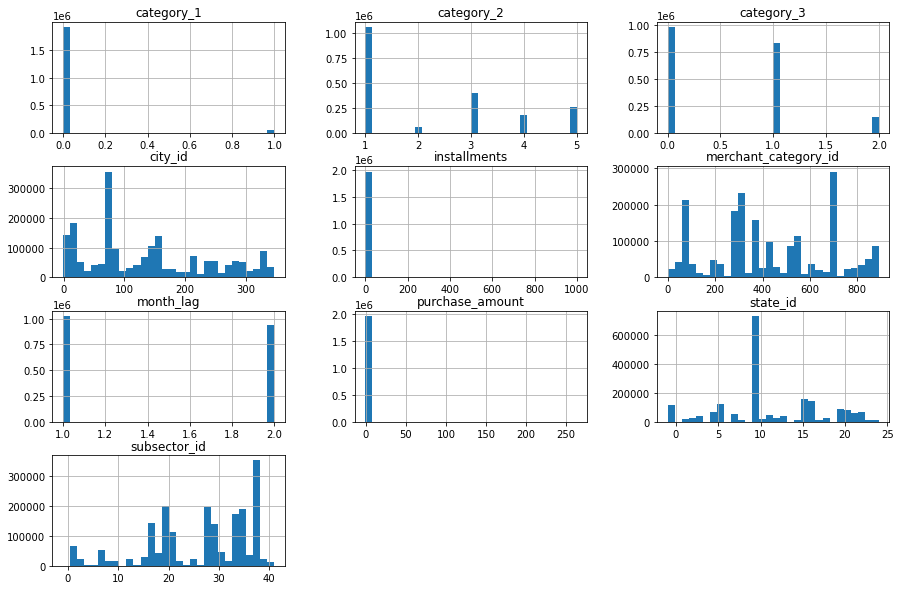

In [31]:
new_transactions.hist(bins=30, figsize=(15, 10))

From the plot we can see the distribution of values of categorical features which occurs maximum time and we can see that for category_1 we have 2 values and the value 1 occures for maximum times, for category_2 we have 5 values and the value 1 occures for maximum times, for category_3 we have 3 values and the value 0 occures for maximum times, for the feature month_lag we gave 2 values and value 1 occurs maximum times.
For the features installments and purchase_amount we can see that both have small value which are near 0. We will look into those features to see in what range their values lie
Rest of the features are id types which uniqiely identify the features.

For the installments feature we can see that 75% points have value around 1 but we have some outliners value which are close to 1000

In [25]:
new_transactions.installments.describe()

count    1.963031e+06
mean     7.389226e-01
std      1.188660e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.200000e+01
Name: installments, dtype: float64

In [24]:
val = new_transactions.installments.median()
new_transactions['installments'].replace(-1, val,inplace=True)
new_transactions['installments'].replace(999, val,inplace=True)

For the purchase amount feature we can see that 75% points have value which are negative and some outliners value which have values which are positive

In [32]:
new_transactions.purchase_amount.describe()

count    1.963031e+06
mean    -5.834388e-01
std      2.695303e-01
min     -7.468928e-01
25%     -7.166294e-01
50%     -6.748406e-01
75%     -5.816162e-01
max      8.000000e-01
Name: purchase_amount, dtype: float64

In [114]:
new_transactions['purchase_amount'] = new_transactions['purchase_amount'].apply(lambda x: min(x, 0.8))

In [115]:
#Creating more features which depends on date
new_transactions['purchase_date'] = pd.to_datetime(new_transactions['purchase_date'])
new_transactions['month_diff'] = ((datetime.datetime.today() - new_transactions['purchase_date']).dt.days)//30
new_transactions['month_diff'] += new_transactions['month_lag']

new_transactions['n_duration'] = new_transactions['purchase_amount']*new_transactions['month_diff']
new_transactions['n_amount_month_ratio'] = new_transactions['purchase_amount']/new_transactions['month_diff']
new_transactions['n_price'] = new_transactions['purchase_amount'] / new_transactions['installments']

In [116]:
y = pd.get_dummies(new_transactions.category_3, prefix='category_3')
new_transactions['category_3_0.0'] = y['category_3_0.0']
new_transactions['category_3_1.0'] = y['category_3_1.0']
new_transactions['category_3_2.0'] = y['category_3_2.0']

In [117]:
y = pd.get_dummies(new_transactions.category_2, prefix='category_2')
new_transactions['category_2_1.0'] = y['category_2_1.0']
new_transactions['category_2_2.0'] = y['category_2_2.0']
new_transactions['category_2_3.0'] = y['category_2_3.0']
new_transactions['category_2_4.0'] = y['category_2_4.0']
new_transactions['category_2_5.0'] = y['category_2_5.0']


In [118]:
new_transactions.drop(columns=['category_2','category_3'],inplace=True)

In [119]:
# Christmas : December 25 2017
new_transactions['Christmas_Day_2017'] = (pd.to_datetime('2017-12-25')-new_transactions['purchase_date']).dt.days.apply(lambda x: x if x > 0 and x < 100 else 0)
# Mothers Day: May 14 2017
new_transactions['Mothers_Day_2017'] = (pd.to_datetime('2017-06-04')-new_transactions['purchase_date']).dt.days.apply(lambda x: x if x > 0 and x < 100 else 0)
# fathers day: August 13 2017
new_transactions['fathers_day_2017'] = (pd.to_datetime('2017-08-13')-new_transactions['purchase_date']).dt.days.apply(lambda x: x if x > 0 and x < 100 else 0)
# Childrens day: October 12 2017
new_transactions['Children_day_2017'] = (pd.to_datetime('2017-10-12')-new_transactions['purchase_date']).dt.days.apply(lambda x: x if x > 0 and x < 100 else 0)
# Valentine's Day : 12th June, 2017
new_transactions['Valentine_Day_2017'] = (pd.to_datetime('2017-06-12')-new_transactions['purchase_date']).dt.days.apply(lambda x: x if x > 0 and x < 100 else 0)
# Black Friday : 24th November 2017
new_transactions['Black_Friday_2017'] = (pd.to_datetime('2017-11-24') - new_transactions['purchase_date']).dt.days.apply(lambda x: x if x > 0 and x < 100 else 0)

# 2018
# Mothers Day: May 13 2018
new_transactions['Mothers_Day_2018'] = (pd.to_datetime('2018-05-13')-new_transactions['purchase_date']).dt.days.apply(lambda x: x if x > 0 and x < 100 else 0)


In [122]:
# creating new features from existing features such as taking mean,max,unique values
# below function takes a dataframe and a prefix for column name and create new features and return the new dataframe
# as their are multiple values for single card id this function uses groupby to group all the cards and then uses the agg
# function on top of it to calculate the aggregation functions like min,max,ect
def aggregate_new_transactions(new_trans,prefix):    
    agg_func = {
        'category_1':   ['mean','nunique','sum'],
        'category_3_0.0':   ['mean','sum'],
        'category_3_1.0':   ['mean','sum'],
        'category_3_2.0':   ['mean','sum'],
        'category_2_1.0':   ['mean','sum'],
        'category_2_2.0':   ['mean','sum'],
        'category_2_3.0':   ['mean','sum'],
        'category_2_4.0':   ['mean','sum'],
        'category_2_5.0':   ['mean','sum'],     
        'merchant_id': ['nunique'],
        'Christmas_Day_2017': ['mean','var'],
        'Mothers_Day_2017': ['mean','var'],
        'fathers_day_2017': ['mean','var'],
        'Children_day_2017': ['mean','var'],
        'Valentine_Day_2017': ['mean','var'],
        'Black_Friday_2017': ['mean','var'],
        'Mothers_Day_2018': ['mean','var'],
        'merchant_category_id': ['nunique'],
        'city_id': ['nunique'],
        'purchase_amount': ['sum','max','min','mean','var','skew'],
        'purchase_date': ['max', 'min'],
        'installments': ['sum','max','min','mean','var','skew'],
        'month_lag': ['sum','min', 'max','mean','var','skew'],
        'state_id': ['nunique'],
        'subsector_id': ['nunique'],
        'n_price' :['sum','mean','max','min','var'],
        'n_duration' : ['mean','min','max','var','skew'],
        'n_amount_month_ratio':['mean','min','max','var','skew'],
        'month_diff': ['mean','min','max','var','skew']
        }
    #computing all the aggs values
    agg_new_trans = new_trans.groupby(['card_id']).agg(agg_func)
    # giving name to all the calculated values
    agg_new_trans.columns = [prefix +'_'+ '_'.join(col).strip() 
                           for col in agg_new_trans.columns.values]
    agg_new_trans.reset_index(inplace=True)
    # calculating accuracne of single card_id(how many rows are there with sanme card_id)
    df = (new_trans.groupby('card_id').size().reset_index(name='new_transactions_count'))
    # merging occurance of card_id with all the calculated aggs features
    agg_new_trans = pd.merge(df, agg_new_trans, on='card_id', how='left')
    
    return agg_new_trans


In [123]:
agg_new_transactions = aggregate_new_transactions(new_transactions,'new_tr')
agg_new_transactions.head()

,card_id,new_transactions_count,new_tr_category_1_mean,new_tr_category_1_nunique,new_tr_category_1_sum,new_tr_category_3_0.0_mean,new_tr_category_3_0.0_sum,new_tr_category_3_1.0_mean,new_tr_category_3_1.0_sum,new_tr_category_3_2.0_mean,...,new_tr_n_amount_month_ratio_mean,new_tr_n_amount_month_ratio_min,new_tr_n_amount_month_ratio_max,new_tr_n_amount_month_ratio_var,new_tr_n_amount_month_ratio_skew,new_tr_month_diff_mean,new_tr_month_diff_min,new_tr_month_diff_max,new_tr_month_diff_var,new_tr_month_diff_skew
0,C_ID_00007093c1,2,0.000000,1,0,0.000000,0,1.000000,2,0.000000,...,-0.018979,-0.019194,-0.018764,9.216176e-08,NaN,35.000000,35,35,0.000000,NaN
1,C_ID_0001238066,26,0.076923,2,2,0.038462,1,0.807692,21,0.153846,...,-0.016572,-0.021168,-0.002303,2.525667e-05,1.573947,34.461538,34,35,0.258462,0.163916
2,C_ID_0001506ef0,2,0.000000,1,0,1.000000,2,0.000000,0,0.000000,...,-0.020984,-0.021529,-0.020439,5.949484e-07,NaN,34.500000,34,35,0.500000,NaN
3,C_ID_0001793786,31,0.000000,1,0,1.000000,31,0.000000,0,0.000000,...,-0.004353,-0.019122,0.021053,1.948446e-04,0.884160,38.290323,38,39,0.212903,0.971526
4,C_ID_000183fdda,11,0.000000,1,0,0.090909,1,0.545455,6,0.363636,...,-0.017221,-0.020924,-0.003167,2.724659e-05,2.294204,34.727273,34,35,0.218182,-1.189373


In [133]:
agg_new_transactions.isnull().sum()

card_id                      0
new_transactions_count       0
new_tr_category_1_mean       0
new_tr_category_1_nunique    0
new_tr_category_1_sum        0
                            ..
new_tr_month_diff_mean       0
new_tr_month_diff_min        0
new_tr_month_diff_max        0
new_tr_month_diff_var        0
new_tr_month_diff_skew       0
Length: 80, dtype: int64

In [128]:
agg_new_transactions.new_tr_month_diff_var.fillna(0.203728,inplace=True)

In [131]:
agg_new_transactions.new_tr_month_diff_skew.fillna(-0.199049,inplace=True)

In [132]:
agg_new_transactions.to_pickle('agg_new_transactions.pkl')

In [38]:
agg_new_transactions = pd.read_pickle('agg_new_transactions.pkl')

Merging the features created using new_transaction files with test and train files on card id

In [134]:
train_nt = pd.merge(train,agg_new_transactions, on= 'card_id', how='left')

In [135]:
train_nt = reduce_mem_usage(train_nt)

Mem. usage decreased to 50.84 Mb (68.3% reduction)


In [136]:
train_nt.shape

(201917, 103)

In [137]:
train_nt['new_tr_purchase_date_max'] = pd.to_datetime(train_nt['new_tr_purchase_date_max'])
train_nt['new_tr_purchase_date_min'] = pd.to_datetime(train_nt['new_tr_purchase_date_min'])
train_nt['new_time_diff'] = (train_nt['new_tr_purchase_date_max'].dt.date - train_nt['new_tr_purchase_date_min'].dt.date).dt.days

In [138]:
test_nt = pd.merge(test, agg_new_transactions, on='card_id', how='left')

In [139]:
test_nt['new_tr_purchase_date_max'] = pd.to_datetime(test_nt['new_tr_purchase_date_max'])
test_nt['new_tr_purchase_date_min'] = pd.to_datetime(test_nt['new_tr_purchase_date_min'])
test_nt['new_time_diff'] = (test_nt['new_tr_purchase_date_max'].dt.date - test_nt['new_tr_purchase_date_min'].dt.date).dt.days

In [140]:
print(train_nt.shape)
print(test_nt.shape)

(201917, 104)
(123623, 103)


In [141]:
train_nt.to_pickle('train_nt.pkl')
test_nt.to_pickle('test_nt.pkl')

Reading the 4th csv file which is historical_transactions and priting the shape and first 5 rows

In [3]:
ht = pd.read_csv('historical_transactions.csv')
historical_transactions = reduce_mem_usage(ht)
del ht
# historical_transactions = pd.read_pickle('history_trans.pkl')
print(historical_transactions.shape)
historical_transactions.head()

Mem. usage decreased to 1749.11 Mb (43.7% reduction)
(29112361, 14)


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [8]:
# historical_transactions.to_pickle('history_trans.pkl')

Description of columns provided for historical_transactions.csv file - 

card_id - Card identifier

month_lag -	month lag to reference date

purchase_date -	Purchase date

authorized_flag - Y' if approved, 'N' if denied

category_3 - anonymized category

installments - number of installments of purchase

category_1 - anonymized category

merchant_category_id - Merchant category identifier (anonymized )

subsector_id - Merchant category group identifier (anonymized )

merchant_id - Merchant identifier (anonymized)

purchase_amount	- Normalized purchase amount

city_id	City - identifier (anonymized )

state_id - State identifier (anonymized )

category_2 - anonymized category


In [33]:
# checking how many unique values a column contains
historical_transactions.nunique()

authorized_flag                2
card_id                   325540
city_id                      308
category_1                     2
installments                  15
category_3                     3
merchant_category_id         327
merchant_id               326311
month_lag                     14
purchase_amount           215014
purchase_date           16395300
category_2                     5
state_id                      25
subsector_id                  41
dtype: int64

In [6]:
# checking the data types of columns
historical_transactions.dtypes

authorized_flag           int64
card_id                  object
city_id                   int16
category_1                int64
installments              int16
category_3              float64
merchant_category_id      int16
merchant_id              object
month_lag                  int8
purchase_amount         float32
purchase_date            object
category_2              float16
state_id                   int8
subsector_id               int8
dtype: object

In [3]:
# checking if there are any null values
historical_transactions.isnull().sum()

authorized_flag               0
card_id                       0
city_id                       0
category_1                    0
installments                  0
category_3               178159
merchant_category_id          0
merchant_id              138481
month_lag                     0
purchase_amount               0
purchase_date                 0
category_2              2652864
state_id                      0
subsector_id                  0
dtype: int64

Here we can see that their are 3 features which contains null values we will explore those features and fill the null values

In [3]:
train_cat3 = historical_transactions[~historical_transactions['category_3'].isnull()].drop(columns=['category_2','merchant_id','card_id','purchase_date']).sample(300000)
test_cat3 = historical_transactions[historical_transactions['category_3'].isnull()].drop(columns=['category_2','merchant_id','card_id','purchase_date'])

In [4]:
train_cat3.head()

,authorized_flag,city_id,category_1,installments,category_3,merchant_category_id,month_lag,purchase_amount,state_id,subsector_id
24591753,0,69,0,0,0.0,560,-5,-0.703646,9,34
24410144,1,340,0,0,0.0,278,-4,-0.683346,9,37
4616781,1,158,0,1,1.0,278,-4,-0.712497,15,37
6476221,0,232,0,1,1.0,80,-5,-0.690558,13,37
18837610,1,-1,1,1,1.0,302,-2,-0.449383,-1,22


In [5]:
test_cat3.head()

,authorized_flag,city_id,category_1,installments,category_3,merchant_category_id,month_lag,purchase_amount,state_id,subsector_id
885,0,251,0,-1,NaN,34,-1,-0.297615,8,38
914,1,251,0,-1,NaN,391,0,-0.393785,8,7
936,1,251,0,-1,NaN,307,-3,-0.475694,8,19
941,1,170,0,-1,NaN,222,-1,-0.551563,8,21
965,1,251,0,-1,NaN,514,-1,-0.114893,8,9


In [6]:
y = train_cat3['category_3'].values
X = train_cat3.drop(columns='category_3').values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
clf = XGBClassifier(gpu_id=0,tree_method = 'gpu_hist')
clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan,
              monotone_constraints='(0,0,0,0,0,0,0,0,0)', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='gpu_hist', validate_parameters=1,
              verbosity=None)

In [7]:
result = clf.predict(X_test)
print(accuracy_score(y_test,result))

1.0


In [8]:
predicted_cat3 = clf.predict(test_cat3.drop(columns='category_3').values)
print(predicted_cat3)

[0. 0. 0. ... 0. 0. 0.]


In [9]:
new_set = set(predicted_cat3) 
print("No of unique items in the list are:", len(new_set))

No of unique items in the list are: 1


In [4]:
historical_transactions['category_3'].fillna(0.0,inplace=True)

In [46]:
# filling the nan values for category_2   
historical_transactions['category_2'].value_counts()

1.0    15177199
3.0     3911795
5.0     3725915
4.0     2618053
2.0     1026535
Name: category_2, dtype: int64

In [5]:
historical_transactions['category_2'].fillna(1.0,inplace=True)

In [48]:
historical_transactions.isnull().sum()

authorized_flag              0
card_id                      0
city_id                      0
category_1                   0
installments                 0
category_3                   0
merchant_category_id         0
merchant_id             138481
month_lag                    0
purchase_amount              0
purchase_date                0
category_2                   0
state_id                     0
subsector_id                 0
dtype: int64

In [11]:
historical_transactions.merchant_id.value_counts()

M_ID_00a6ca8a8a    1115097
M_ID_e5374dabc0     428619
M_ID_9139332ccc     361385
M_ID_50f575c681     183894
M_ID_fc7d7969c3     177040
                    ...   
M_ID_7d41f7b4cd          1
M_ID_b1430d4bd5          1
M_ID_046ec15d51          1
M_ID_db7fa90dd6          1
M_ID_5e3975b3ce          1
Name: merchant_id, Length: 326311, dtype: int64

In [6]:
historical_transactions['merchant_id'].fillna('M_ID_00a6ca8a8a',inplace=True)

Plotting the histogram of features present in historical_transactions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DDB4DF2B48>,
      dtype=object)

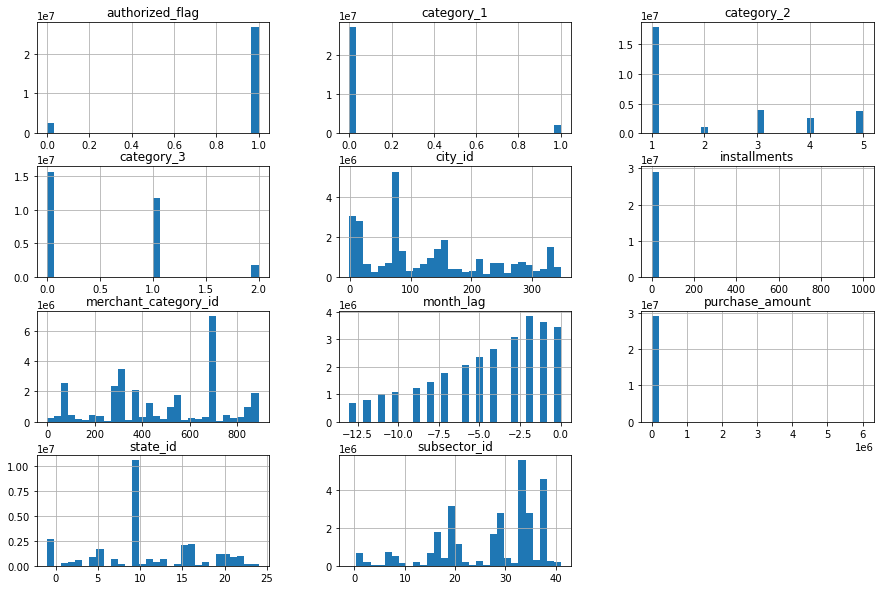

In [49]:
historical_transactions.hist(bins=30, figsize=(15, 10))

From the plot we can see the distribution of values of categorical features which occurs maximum time and we can see that for category_1 we have 2 values and the value 0 occures for maximum times, for category_2 we have 5 values and the value 1 occures for maximum times, for category_3 we have 3 values and the value 0 occures for maximum times, for authorized_flag we have 2 values and the value 1 occures for maximum times, for the feature month_lag we see that the all the values lies in the negative region.
For the features installments and purchase_amount we can see that both have small value which are near 0. We will look into those features to see in what range their values lie
Rest of the features are id types which uniqiely identify the features.

In [50]:
historical_transactions.installments.describe()

count    2.911236e+07
mean     6.484954e-01
std      2.795577e+00
min     -1.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      9.990000e+02
Name: installments, dtype: float64

Here we are seeing similar results like new_transaction maximum values are around 1 but some outliners are there having value close to 1000

In [42]:
historical_transactions.purchase_amount.describe()

count    2.911236e+07
mean     6.134567e-02
std      1.123521e+03
min     -7.469078e-01
25%     -7.203559e-01
50%     -6.883495e-01
75%     -6.032543e-01
max      6.010604e+06
Name: purchase_amount, dtype: float64

For the purchase amount feature we can see that 75% points have value which are negative close to 0 as it is normalised and some outliners value which have values which are very high

In [7]:
# handling outliners in installments and purchase amount
val = historical_transactions.installments.median()
historical_transactions['installments'].replace(-1, np.nan,inplace=True)
historical_transactions['installments'].replace(999, np.nan,inplace=True)
historical_transactions['purchase_amount'] = historical_transactions['purchase_amount'].apply(lambda x: min(x, 0.8))

In [8]:
historical_transactions['purchase_date'] = pd.to_datetime(historical_transactions['purchase_date'])

In [9]:
historical_transactions['h_month_diff'] = ((datetime.datetime.today() - historical_transactions['purchase_date']).dt.days)//30
historical_transactions['h_month_diff'] += historical_transactions['month_lag']

historical_transactions['h_duration'] = historical_transactions['purchase_amount']*historical_transactions['h_month_diff']
historical_transactions['h_amount_month_ratio'] = historical_transactions['purchase_amount']/historical_transactions['h_month_diff']
historical_transactions['h_price'] = historical_transactions['purchase_amount'] / historical_transactions['installments']

In [10]:
historical_transactions['category_3'] = historical_transactions['category_3'].map({'A':0, 'B':1, 'C':2}) 

In [11]:
y = pd.get_dummies(historical_transactions.category_3, prefix='hist_category_3')

In [12]:
historical_transactions['hist_category_3_0.0'] = y['hist_category_3_0.0']
historical_transactions['hist_category_3_1.0'] = y['hist_category_3_1.0']
historical_transactions['hist_category_3_2.0'] = y['hist_category_3_2.0']

In [13]:
y = pd.get_dummies(historical_transactions.category_2, prefix='hist_category_2')

In [14]:
historical_transactions['hist_category_2_1.0'] = y['hist_category_2_1.0']
historical_transactions['hist_category_2_2.0'] = y['hist_category_2_2.0']
historical_transactions['hist_category_2_3.0'] = y['hist_category_2_3.0']
historical_transactions['hist_category_2_4.0'] = y['hist_category_2_4.0']
historical_transactions['hist_category_2_5.0'] = y['hist_category_2_5.0']

In [15]:
historical_transactions.drop(columns=['category_2','category_3'],inplace=True)
historical_transactions = reduce_mem_usage(historical_transactions)

Mem. usage decreased to 1998.99 Mb (30.1% reduction)


In [16]:
# Christmas : December 25 2017
historical_transactions['h_Christmas_Day_2017'] = (pd.to_datetime('2017-12-25')-historical_transactions['purchase_date']).dt.days.apply(lambda x: x if x > 0 and x < 100 else 0)
# Mothers Day: May 14 2017
historical_transactions['h_Mothers_Day_2017'] = (pd.to_datetime('2017-06-04')-historical_transactions['purchase_date']).dt.days.apply(lambda x: x if x > 0 and x < 100 else 0)
# fathers day: August 13 2017
historical_transactions['h_fathers_day_2017'] = (pd.to_datetime('2017-08-13')-historical_transactions['purchase_date']).dt.days.apply(lambda x: x if x > 0 and x < 100 else 0)
# Childrens day: October 12 2017
historical_transactions['h_Children_day_2017'] = (pd.to_datetime('2017-10-12')-historical_transactions['purchase_date']).dt.days.apply(lambda x: x if x > 0 and x < 100 else 0)
# Valentine's Day : 12th June, 2017
historical_transactions['h_Valentine_Day_2017'] = (pd.to_datetime('2017-06-12')-historical_transactions['purchase_date']).dt.days.apply(lambda x: x if x > 0 and x < 100 else 0)
# Black Friday : 24th November 2017
historical_transactions['h_Black_Friday_2017'] = (pd.to_datetime('2017-11-24') - historical_transactions['purchase_date']).dt.days.apply(lambda x: x if x > 0 and x < 100 else 0)

# 2018
# Mothers Day: May 13 2018
historical_transactions['h_Mothers_Day_2018'] = (pd.to_datetime('2018-05-13')-historical_transactions['purchase_date']).dt.days.apply(lambda x: x if x > 0 and x < 100 else 0)


In [17]:
historical_transactions = reduce_mem_usage(historical_transactions)

Mem. usage decreased to 2193.33 Mb (38.3% reduction)


Taking sum of last 10 transaction days as their are some cards performed less then 10 transaction so firstly getting the cards having transaction more 10 times

In [17]:
df1 = historical_transactions[historical_transactions.groupby(['card_id'])['purchase_date'].transform('count') > 10]

In [24]:
df1 = df1.sort_values(['card_id','purchase_date'],ascending=False)

In [35]:
num = (df1.groupby('card_id')['purchase_date'].apply(lambda g: g.iloc[0] - g.iloc[10]).dt.days)

In [37]:
date_diff = pd.DataFrame(num).reset_index()
date_diff.columns = ['card_id', 'last_ten_transaction_date_count']

Merging with train to check if the last 10 transactions days helps for predicting loyalty score

In [38]:
train_diff = pd.merge(train, date_diff, on='card_id', how='left')

In [39]:
train_diff.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,last_ten_transaction_date_count
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,8.0
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,4.0
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,177.0
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,16.0
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,3.0


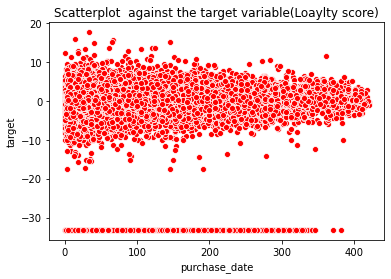

In [31]:
sns.scatterplot(x=train_diff['last_ten_transaction_date_count'], y=train_diff['target'], color='red')
plt.title('Scatterplot of last_ten_transaction_date_count against the target variable(Loaylty score)')
plt.show()

Here we can see that as the days are increasing loyalty score is getting closer to 0. But still it is not enough to provide good information

Loading the merchants.csv file and and looking the first 5 rows

In [18]:
m = pd.read_csv('merchants.csv')
merchant = reduce_mem_usage(m)
print(merchant.shape)
merchant.head()

Mem. usage decreased to 30.32 Mb (46.0% reduction)
(334696, 22)


,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057465,-0.057465,N,E,E,-0.400000,...,-2.250000,18.666667,6,-2.320000,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057465,-0.057465,N,E,E,-0.720000,...,-0.740000,1.291667,6,-0.570000,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057465,-0.057465,N,E,E,-82.129997,...,-82.129997,260.000000,2,-82.129997,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057465,-0.057465,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057465,-0.057465,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


Description of columns provided for merchant.csv file - 

merchant_id	- Unique merchant identifier

merchant_group_id -	Merchant group (anonymized )

merchant_category_id - Unique identifier for merchant category (anonymized )

subsector_id - Merchant category group (anonymized )

numerical_1	- anonymized measure

numerical_2	- anonymized measure

category_1 - anonymized category

most_recent_sales_range	Range of revenue (monetary units) in last active month --> A > B > C > D > E

most_recent_purchases_range	Range of quantity of transactions in last active month --> A > B > C > D > E

avg_sales_lag3 - Monthly average of revenue in last 3 months divided by revenue in last active month

avg_purchases_lag3 - Monthly average of transactions in last 3 months divided by transactions in last active month

active_months_lag3 - Quantity of active months within last 3 months

avg_sales_lag6 - Monthly average of revenue in last 6 months divided by revenue in last active month

avg_purchases_lag6 - Monthly average of transactions in last 6 months divided by transactions in last active month

active_months_lag6 - Quantity of active months within last 6 months

avg_sales_lag12	- Monthly average of revenue in last 12 months divided by revenue in last active month

avg_purchases_lag12	- Monthly average of transactions in last 12 months divided by transactions in last active month

active_months_lag12	- Quantity of active months within last 12 months

category_4 - anonymized category

city_id	- City identifier (anonymized )

state_id - State identifier (anonymized )

category_2 - anonymized category

In [ ]:
historical_transactions.nunique()

In [57]:
#looking the unique value a fetures holds
merchant.nunique()

merchant_id                    334633
merchant_group_id              109391
merchant_category_id              324
subsector_id                       41
numerical_1                       954
numerical_2                       947
category_1                          2
most_recent_sales_range             5
most_recent_purchases_range         5
avg_sales_lag3                   3372
avg_purchases_lag3             100003
active_months_lag3                  3
avg_sales_lag6                   4507
avg_purchases_lag6             135202
active_months_lag6                  6
avg_sales_lag12                  5009
avg_purchases_lag12            172917
active_months_lag12                12
category_4                          2
city_id                           271
state_id                           25
category_2                          5
dtype: int64

In [58]:
# checking the data types of features
merchant.dtypes

merchant_id                     object
merchant_group_id                int64
merchant_category_id             int64
subsector_id                     int64
numerical_1                    float64
numerical_2                    float64
category_1                      object
most_recent_sales_range         object
most_recent_purchases_range     object
avg_sales_lag3                 float64
avg_purchases_lag3             float64
active_months_lag3               int64
avg_sales_lag6                 float64
avg_purchases_lag6             float64
active_months_lag6               int64
avg_sales_lag12                float64
avg_purchases_lag12            float64
active_months_lag12              int64
category_4                      object
city_id                          int64
state_id                         int64
category_2                     float64
dtype: object

In [59]:
# looking for null values
merchant.isnull().sum()

merchant_id                        0
merchant_group_id                  0
merchant_category_id               0
subsector_id                       0
numerical_1                        0
numerical_2                        0
category_1                         0
most_recent_sales_range            0
most_recent_purchases_range        0
avg_sales_lag3                    13
avg_purchases_lag3                 0
active_months_lag3                 0
avg_sales_lag6                    13
avg_purchases_lag6                 0
active_months_lag6                 0
avg_sales_lag12                   13
avg_purchases_lag12                0
active_months_lag12                0
category_4                         0
city_id                            0
state_id                           0
category_2                     11887
dtype: int64

In [60]:
merchant.avg_sales_lag3.describe()

count    334683.000000
mean         13.832993
std        2395.489999
min         -82.130000
25%           0.880000
50%           1.000000
75%           1.160000
max      851844.640000
Name: avg_sales_lag3, dtype: float64

As the avg_sales_lag3 has some missing value filling the missing value with the median because you can see max value is very which might have affected the mean and doing same for other 2 features which have null values

In [19]:
val = merchant.avg_sales_lag3.median()
merchant['avg_sales_lag3'].fillna(val,inplace=True)

In [62]:
merchant.avg_sales_lag6.describe()

count    3.346830e+05
mean     2.165079e+01
std      3.947108e+03
min     -8.213000e+01
25%      8.500000e-01
50%      1.010000e+00
75%      1.230000e+00
max      1.513959e+06
Name: avg_sales_lag6, dtype: float64

In [20]:
val = merchant.avg_sales_lag6.median()
merchant['avg_sales_lag6'].fillna(val,inplace=True)

In [64]:
merchant.avg_sales_lag12.describe()

count    3.346830e+05
mean     2.522771e+01
std      5.251842e+03
min     -8.213000e+01
25%      8.500000e-01
50%      1.020000e+00
75%      1.290000e+00
max      2.567408e+06
Name: avg_sales_lag12, dtype: float64

In [21]:
val = merchant.avg_sales_lag12.median()
merchant['avg_sales_lag12'].fillna(val,inplace=True)

After looking at avg_purchase_lag_3, avg_purchase_lag_6, avg_purchase_lag_12 we saw that they contains infinite value so we converted the infinite value to nan values and then imputed them with median values for all 3 features

In [66]:
merchant.avg_purchases_lag3.describe()

count    3.346960e+05
mean              inf
std               NaN
min      3.334953e-01
25%      9.236499e-01
50%      1.016667e+00
75%      1.146522e+00
max               inf
Name: avg_purchases_lag3, dtype: float64

In [22]:
#converting all the infinte values to median values
val = merchant.avg_purchases_lag3.median()
merchant.avg_purchases_lag3.replace([np.inf, -np.inf],val, inplace=True)

In [68]:
merchant.avg_purchases_lag6.describe()

count    3.346960e+05
mean              inf
std               NaN
min      1.670447e-01
25%      9.022475e-01
50%      1.026961e+00
75%      1.215575e+00
max               inf
Name: avg_purchases_lag6, dtype: float64

In [23]:
val = merchant.avg_purchases_lag6.median()
merchant.avg_purchases_lag6.replace([np.inf, -np.inf],val, inplace=True)

In [70]:
merchant.avg_purchases_lag12.describe()

count    3.346960e+05
mean              inf
std               NaN
min      9.832954e-02
25%      8.983333e-01
50%      1.043361e+00
75%      1.266480e+00
max               inf
Name: avg_purchases_lag12, dtype: float64

In [24]:
val = merchant.avg_purchases_lag12.median()
merchant.avg_purchases_lag12.replace([np.inf, -np.inf],val, inplace=True)

In [72]:
merchant['category_2'].value_counts()

1.0    160888
5.0     52923
3.0     51887
4.0     36450
2.0     20661
Name: category_2, dtype: int64

In [25]:
merchant['category_2'].fillna(1.0,inplace=True)

In [63]:
# checking if it still contains any null value
merchant.isnull().sum()

merchant_id                    0
merchant_group_id              0
merchant_category_id           0
subsector_id                   0
numerical_1                    0
numerical_2                    0
category_1                     0
most_recent_sales_range        0
most_recent_purchases_range    0
avg_sales_lag3                 0
avg_purchases_lag3             0
active_months_lag3             0
avg_sales_lag6                 0
avg_purchases_lag6             0
active_months_lag6             0
avg_sales_lag12                0
avg_purchases_lag12            0
active_months_lag12            0
category_4                     0
city_id                        0
state_id                       0
category_2                     0
dtype: int64

In [26]:
# as given in description A>B>C>D>E providing larger value to A and smaller value to E
merchant['category_1'] = merchant['category_1'].map({'N':0, 'Y':1})
merchant['category_4'] = merchant['category_4'].map({'N':0, 'Y':1})
merchant['most_recent_sales_range'] = merchant['most_recent_sales_range'].map({'A':5, 'B':4, 'C':3, 'D':2, 'E':1})
merchant['most_recent_purchases_range'] = merchant['most_recent_purchases_range'].map({'A':5, 'B':4, 'C':3, 'D':2, 'E':1})

In [27]:
y = pd.get_dummies(merchant.category_2, prefix='me_category_2')

In [28]:
merchant['me_category_2_1.0'] = y['me_category_2_1.0']
merchant['me_category_2_2.0'] = y['me_category_2_2.0']
merchant['me_category_2_3.0'] = y['me_category_2_3.0']
merchant['me_category_2_4.0'] = y['me_category_2_4.0']
merchant['me_category_2_5.0'] = y['me_category_2_5.0']

Plotting histogram for features in merchants.csv

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD38D07888>,
      dtype=object)

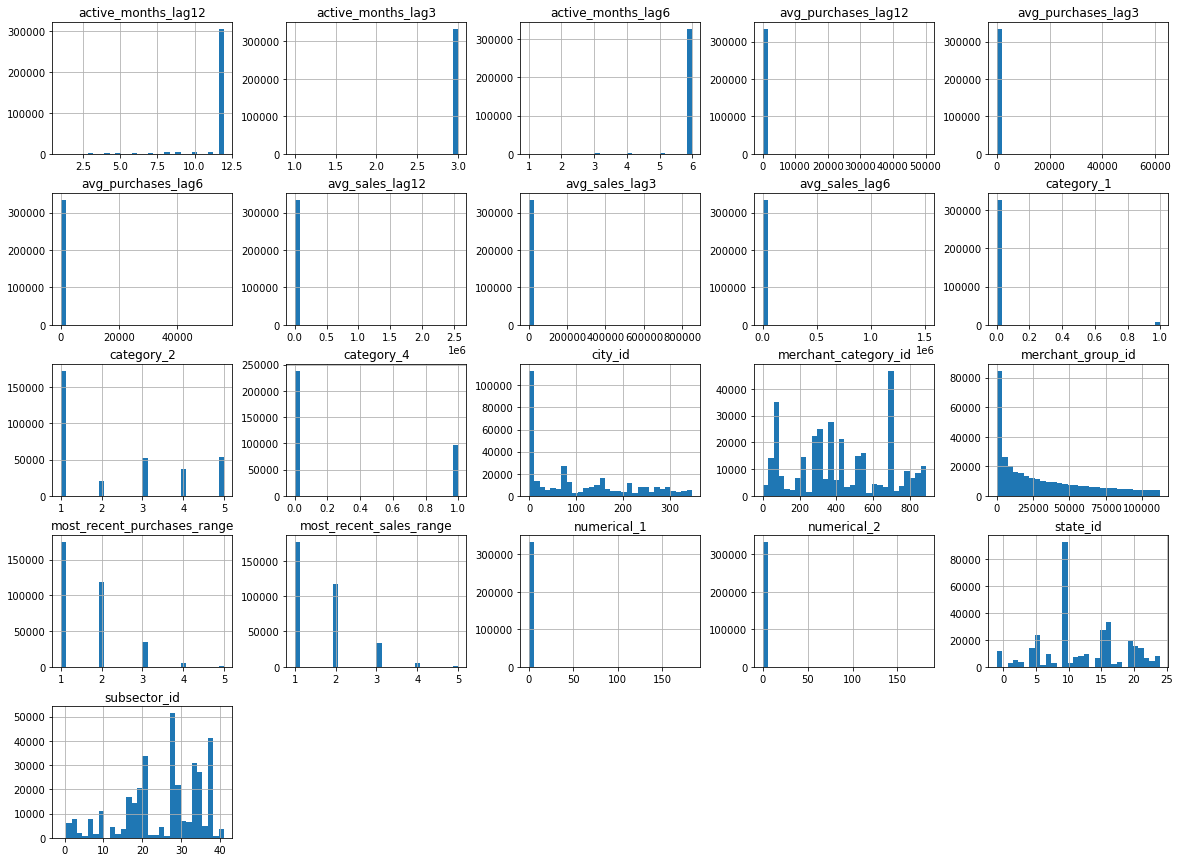

In [76]:
merchant.hist(bins=30, figsize=(20, 15))

Features such as numerical_1, numerical_2, avg_sale_lag for 3,6,12 months and avg_purchase_lag for 3,6,12 months have values close to 0
Category_1 and category_4 have maximum value as 1 and category_2 have maximum values as 1 followed by 3 and 5.
As merchant.csv does not have card_id it will not be joined with our train file

Now lets see the corelation of our created features with the target variable

Merging merchant file with historical_transactions file on merchant_id to include all the features present in mercahant file

In [30]:
merchant.drop(columns=['merchant_category_id','city_id','state_id','subsector_id','category_2'],inplace=True)

In [31]:
#renaming column names for category variables
merchant.rename(columns={"category_1": "m_category_1", "category_4": "m_category_4"}, errors="raise",inplace=True)

In [32]:
all_transactions = pd.merge(historical_transactions, merchant, on='merchant_id', how='left')

In [33]:
del merchant
del historical_transactions

In [72]:
all_transactions.isnull().sum()

authorized_flag                     0
card_id                             0
city_id                             0
category_1                          0
installments                   185736
category_3                          0
merchant_category_id                0
merchant_id                         0
month_lag                           0
purchase_amount                     0
purchase_date                       0
category_2                          0
state_id                            0
subsector_id                        0
h_month_diff                        0
h_duration                          0
h_amount_month_ratio                0
h_price                        185739
merchant_group_id                   0
numerical_1                         0
numerical_2                         0
m_category_1                        0
most_recent_sales_range             0
most_recent_purchases_range         0
avg_sales_lag3                      0
avg_purchases_lag3                  0
active_month

In [34]:
all_transactions = reduce_mem_usage(all_transactions)

Mem. usage decreased to 3632.58 Mb (26.9% reduction)


In [24]:
all_transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,...,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,m_category_4,m_category_2
0,Y,C_ID_4e6213e9bc,88,N,0.0,A,80,M_ID_e020e9b302,-8,-0.703125,...,1.082031,3,1.14,1.114258,6,1.19,1.157227,12,1,1.0
1,Y,C_ID_4e6213e9bc,88,N,0.0,A,367,M_ID_86ec983688,-7,-0.732910,...,1.051758,3,1.06,1.058594,6,1.05,1.062500,12,1,1.0
2,Y,C_ID_4e6213e9bc,88,N,0.0,A,80,M_ID_979ed661fc,-6,-0.720215,...,0.974609,3,0.98,0.967285,6,0.97,0.956543,12,1,1.0
3,Y,C_ID_4e6213e9bc,88,N,0.0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,...,1.053711,3,0.88,0.897461,6,0.86,0.864258,12,1,1.0
4,Y,C_ID_4e6213e9bc,88,N,0.0,A,80,M_ID_e020e9b302,-11,-0.722656,...,1.082031,3,1.14,1.114258,6,1.19,1.157227,12,1,1.0


In [51]:
all_transactions.to_pickle("all_trans.pkl")

In [75]:
all_transactions = pd.read_pickle('all_trans.pkl')

In [76]:
all_transactions.columns

Index(['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments',
       'merchant_category_id', 'merchant_id', 'month_lag', 'purchase_amount',
       'purchase_date', 'state_id', 'subsector_id', 'h_month_diff',
       'h_duration', 'h_amount_month_ratio', 'h_price', 'hist_category_3_0.0',
       'hist_category_3_1.0', 'hist_category_3_2.0', 'hist_category_2_1.0',
       'hist_category_2_2.0', 'hist_category_2_3.0', 'hist_category_2_4.0',
       'hist_category_2_5.0', 'h_Christmas_Day_2017', 'h_Mothers_Day_2017',
       'h_fathers_day_2017', 'h_Children_day_2017', 'h_Valentine_Day_2017',
       'h_Black_Friday_2017', 'h_Mothers_Day_2018', 'merchant_group_id',
       'numerical_1', 'numerical_2', 'm_category_1', 'most_recent_sales_range',
       'most_recent_purchases_range', 'avg_sales_lag3', 'avg_purchases_lag3',
       'active_months_lag3', 'avg_sales_lag6', 'avg_purchases_lag6',
       'active_months_lag6', 'avg_sales_lag12', 'avg_purchases_lag12',
       'active_months_

In [32]:
all_transactions.fillna(0,inplace=True)

In [92]:
all_transactions.isnull().sum()

authorized_flag                0
card_id                        0
city_id                        0
category_1                     0
installments                   0
merchant_category_id           0
merchant_id                    0
month_lag                      0
purchase_amount                0
purchase_date                  0
state_id                       0
subsector_id                   0
h_month_diff                   0
h_duration                     0
h_amount_month_ratio           0
h_price                        0
hist_category_3_0.0            0
hist_category_3_1.0            0
hist_category_3_2.0            0
hist_category_2_1.0            0
hist_category_2_2.0            0
hist_category_2_3.0            0
hist_category_2_4.0            0
hist_category_2_5.0            0
h_Christmas_Day_2017           0
h_Mothers_Day_2017             0
h_fathers_day_2017             0
h_Children_day_2017            0
h_Valentine_Day_2017           0
h_Black_Friday_2017            0
h_Mothers_

In [81]:
all_transactions.h_price.describe()

count    3.028652e+07
mean    -6.150171e-01
std      1.929857e-01
min     -7.468928e-01
25%     -6.719255e-01
50%     -6.719255e-01
75%     -6.719255e-01
max      8.000000e-01
Name: h_price, dtype: float64

In [78]:
all_transactions.h_price.replace([np.inf, -np.inf],-0.6719255, inplace=True)

In [82]:
all_transactions.h_price.fillna(-0.6719255,inplace=True)

In [79]:
all_transactions.installments.replace([np.inf, -np.inf],-0.6484954, inplace=True)

In [84]:
all_transactions.installments.fillna(-0.6719255,inplace=True)

In [39]:
all_transactions['purchase_date'] = pd.to_datetime(all_transactions['purchase_date'])

In [91]:
all_transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,...,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,m_category_4,me_category_2_1.0,me_category_2_2.0,me_category_2_3.0,me_category_2_4.0,me_category_2_5.0
0,1,C_ID_4e6213e9bc,88,0,0.0,80,M_ID_e020e9b302,-8,-0.703125,2017-06-25 15:33:07,...,6,1.19,1.157227,12,1,1,0,0,0,0
1,1,C_ID_4e6213e9bc,88,0,0.0,367,M_ID_86ec983688,-7,-0.732910,2017-07-15 12:10:45,...,6,1.05,1.062500,12,1,1,0,0,0,0
2,1,C_ID_4e6213e9bc,88,0,0.0,80,M_ID_979ed661fc,-6,-0.720215,2017-08-09 22:04:29,...,6,0.97,0.956543,12,1,1,0,0,0,0
3,1,C_ID_4e6213e9bc,88,0,0.0,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,...,6,0.86,0.864258,12,1,1,0,0,0,0
4,1,C_ID_4e6213e9bc,88,0,0.0,80,M_ID_e020e9b302,-11,-0.722656,2017-03-10 01:14:19,...,6,1.19,1.157227,12,1,1,0,0,0,0


In [88]:
all_transactions['authorized_flag'] = all_transactions['authorized_flag'].map({'N':0, 'Y':1})

In [90]:
all_transactions['category_1'] = all_transactions['category_1'].map({'N':0, 'Y':1})

Applying feature engg on all transaction to create new features

In [93]:
# creating new features from existing features such as taking mean,max,unique values
# below function takes a dataframe and a prefix for column name and create new features and return the new dataframe
# as their are multiple values for single card id this function uses groupby to group all the cards and then uses the agg
# function on top of it to calculate the aggregation functions like min,max,ect

def aggregate_all_transactions(new_trans,prefix):    
    agg_func = {
        'authorized_flag' : ['mean','sum'],
        'category_1':   ['mean','sum'],
        'm_category_1':   ['mean','nunique','sum'],
        'm_category_4':   ['mean','nunique','sum'],        
        'me_category_2_1.0': ['mean','sum'],
        'me_category_2_2.0': ['mean','sum'],
        'me_category_2_3.0': ['mean','sum'],
        'me_category_2_4.0': ['mean','sum'],
        'me_category_2_5.0': ['mean','sum'],
        'hist_category_3_0.0': ['mean','sum'],
        'hist_category_3_1.0': ['mean','sum'],
        'hist_category_3_2.0': ['mean','sum'],
        'hist_category_2_1.0': ['mean','sum'],
        'hist_category_2_2.0': ['mean','sum'],
        'hist_category_2_3.0': ['mean','sum'],
        'hist_category_2_4.0': ['mean','sum'],
        'hist_category_2_5.0': ['mean','sum'],
        'merchant_id': ['nunique'],
        'merchant_category_id': ['nunique'],
        'city_id': ['nunique'],
        'h_Christmas_Day_2017': ['mean','var'],
        'h_Mothers_Day_2017': ['mean','var'],
        'h_fathers_day_2017': ['mean','var'],
        'h_Children_day_2017': ['mean','var'],
        'h_Valentine_Day_2017': ['mean','var'],
        'h_Black_Friday_2017': ['mean','var'],
        'h_Mothers_Day_2018': ['mean','var'],
        'purchase_amount': ['sum','min', 'max','mean','var','skew'],
        'purchase_date': ['max', 'min'],
        'installments': ['sum','min', 'max','mean','var','skew'],
        'month_lag': ['sum','min', 'max','mean','var','skew'],
        'state_id': ['nunique'],
        'subsector_id': ['nunique'],
        'merchant_group_id' : ['nunique'],
        'numerical_1' : ['sum','min', 'max','mean','var','skew'],
        'numerical_2' : ['sum','min', 'max','mean','var','skew'],
        'most_recent_sales_range': ['sum','min', 'max','mean','var','skew'],
        'most_recent_purchases_range': ['sum','min', 'max','mean','var','skew'],
        'avg_sales_lag3': ['sum','min', 'max','mean','var','skew'],
        'avg_sales_lag6': ['sum','min', 'max','mean','var','skew'],
        'avg_sales_lag12': ['sum','min', 'max','mean','var','skew'],
        'avg_purchases_lag3': ['sum','min', 'max','mean','var','skew'],
        'avg_purchases_lag6': ['sum','min', 'max','mean','var','skew'],
        'avg_purchases_lag12': ['sum','min', 'max','mean','var','skew'],
        'active_months_lag3': ['sum','min', 'max','mean','var','skew'],
        'active_months_lag6': ['sum','min', 'max','mean','var','skew'],
        'active_months_lag12': ['sum','min', 'max','mean','var','skew'],
        'h_price' :['sum','mean','max','min','var'],
        'h_duration' : ['mean','min','max','var','skew'],
        'h_amount_month_ratio':['mean','min','max','var','skew'],
        'h_month_diff': ['mean','min','max','var','skew']
        }
    #computing all the aggs values
    agg_new_trans = new_trans.groupby(['card_id']).agg(agg_func)
    # giving name to all the calculated values
    agg_new_trans.columns = [prefix +'_'+ '_'.join(col).strip() 
                           for col in agg_new_trans.columns.values]
    agg_new_trans.reset_index(inplace=True)
    # calculating accuracne of single card_id(how many rows are there with sanme card_id)
    df = (new_trans.groupby('card_id').size().reset_index(name='all_transactions_count'))
    # merging occurance of card_id with all the calculated aggs features
    agg_new_trans = pd.merge(df, agg_new_trans, on='card_id', how='left')
    
    return agg_new_trans


In [94]:
agg_all_trans = aggregate_all_transactions(all_transactions,'all_trans')

In [95]:
agg_all_trans.head()

,card_id,all_transactions_count,all_trans_authorized_flag_mean,all_trans_authorized_flag_sum,all_trans_category_1_mean,all_trans_category_1_sum,all_trans_m_category_1_mean,all_trans_m_category_1_nunique,all_trans_m_category_1_sum,all_trans_m_category_4_mean,...,all_trans_h_amount_month_ratio_mean,all_trans_h_amount_month_ratio_min,all_trans_h_amount_month_ratio_max,all_trans_h_amount_month_ratio_var,all_trans_h_amount_month_ratio_skew,all_trans_h_month_diff_mean,all_trans_h_month_diff_min,all_trans_h_month_diff_max,all_trans_h_month_diff_var,all_trans_h_month_diff_skew
0,C_ID_00007093c1,149,0.765101,114,0.187919,28,0.187919,2,28.0,0.328859,...,-0.015045,-0.021210,0.023529,0.000054,2.841797,34.778523,34,35,0.173590,-1.355186
1,C_ID_0001238066,123,0.975610,120,0.016260,2,0.040650,2,5.0,0.162602,...,-0.017090,-0.021622,0.022598,0.000031,4.093750,34.463415,34,35,0.250700,0.148553
2,C_ID_0001506ef0,68,0.941176,64,0.000000,0,0.058824,2,4.0,0.985294,...,-0.015602,-0.021744,0.022858,0.000147,2.453125,34.779412,34,35,0.174495,-1.378313
3,C_ID_0001793786,222,0.878378,195,0.009009,2,0.144144,2,32.0,0.707207,...,-0.007416,-0.019623,0.021057,0.000154,1.316406,38.626126,38,39,0.235151,-0.524918
4,C_ID_000183fdda,149,0.953020,142,0.026846,4,0.134228,2,20.0,0.953020,...,-0.014961,-0.021652,0.023529,0.000109,2.605469,34.617450,34,35,0.237802,-0.488251


In [71]:
agg_all_trans.all_trans_authorized_flag_sum.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: all_trans_authorized_flag_sum, dtype: float64

In [144]:
agg_all_trans.isnull().sum()

card_id                           0
all_transactions_count            0
all_trans_authorized_flag_mean    0
all_trans_authorized_flag_sum     0
all_trans_category_1_mean         0
                                 ..
all_trans_h_month_diff_mean       0
all_trans_h_month_diff_min        0
all_trans_h_month_diff_max        0
all_trans_h_month_diff_var        0
all_trans_h_month_diff_skew       0
Length: 176, dtype: int64

In [143]:
agg_all_trans.all_trans_h_month_diff_skew.fillna(-0.385426,inplace=True)

In [145]:
agg_all_trans.to_pickle('agg_all_trans.pkl')

In [2]:
agg_all_trans = pd.read_pickle('agg_all_trans.pkl')

In [146]:
agg_all_trans.shape

(325540, 176)

In [76]:
train_nt = pd.read_pickle('train_nt.pkl')
test_nt = pd.read_pickle('test_nt.pkl')

In [147]:
train_all = pd.merge(train_nt,agg_all_trans,on='card_id',how='left')
test_all = pd.merge(test_nt,agg_all_trans,on='card_id',how='left')

In [148]:
print(train_all.shape)
print(test_all.shape)

(201917, 279)
(123623, 278)


In [79]:
train_all.fillna(0,inplace=True)
test_all.fillna(0,inplace=True)

In [80]:
train_all = pd.read_pickle('train_all.pkl')
test_all = pd.read_pickle('test_all.pkl')

In [81]:
print(train_all.shape)
print(test_all.shape)

(201917, 217)
(123623, 216)


In [34]:
train_all.columns

Index(['first_active_month', 'card_id', 'feature_1', 'feature_2', 'feature_3',
       'target', 'year', 'month', 'dayofweek', 'dayofyear',
       ...
       'all_time_diff', 'transactions_total', 'avg_all_card_use',
       'avg_new_card_use', 'total_diff', 'total_avg', 'diff_btw_first_last',
       'total_purchase_sum', 'total_install_sum', 'total_month_lag_mean'],
      dtype='object', length=177)

In [149]:
#checking correlation with target variable
corr = train_all.corr()
print(corr["target"].sort_values(ascending=False))

target                               1.000000
all_trans_h_duration_min             0.079726
all_trans_h_Mothers_Day_2018_var     0.076690
new_tr_Mothers_Day_2018_mean         0.076574
all_trans_h_Mothers_Day_2018_mean    0.062772
                                       ...   
all_trans_h_month_diff_mean         -0.099798
new_tr_month_diff_mean              -0.101452
new_tr_month_diff_max               -0.103575
all_trans_active_months_lag3_max          NaN
all_trans_active_months_lag6_max          NaN
Name: target, Length: 273, dtype: float64


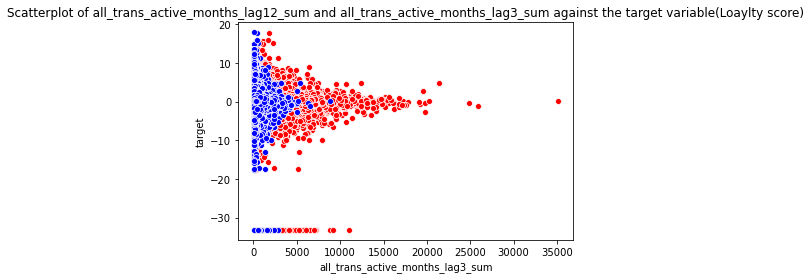

In [91]:
#plotting a scatter plot to check if can see some relation
sns.scatterplot(x=train_all['all_trans_active_months_lag12_sum'], y=train_all['target'], color='red')
sns.scatterplot(x=train_all['all_trans_active_months_lag3_sum'], y=train_all['target'], color='blue')
plt.title('Scatterplot of all_trans_active_months_lag12_sum and all_trans_active_months_lag3_sum against the target variable(Loaylty score)')
plt.show()

With this plot we can see as the values of month lag is increasing loyalty score on getting close to 0

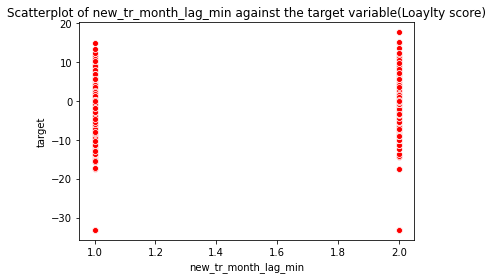

In [97]:
#plotting a scatter plot to check if can see some relation
sns.scatterplot(x=train_all['new_tr_month_lag_min'], y=train_all['target'], color='red')
plt.title('Scatterplot of new_tr_month_lag_min against the target variable(Loaylty score)')
plt.show()

By seeing this it is not possible to conclude anything as range of target variable is looking same for 1 and 2

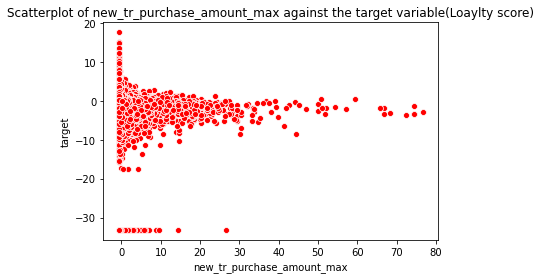

In [98]:
#plotting a scatter plot to check if can see some relation
sns.scatterplot(x=train_all['new_tr_purchase_amount_max'], y=train_all['target'], color='red')
plt.title('Scatterplot of new_tr_purchase_amount_max against the target variable(Loaylty score)')
plt.show()

Here we can see as the value of new_tr_purchase_amount_max is increasing the target variable is getting close to 0

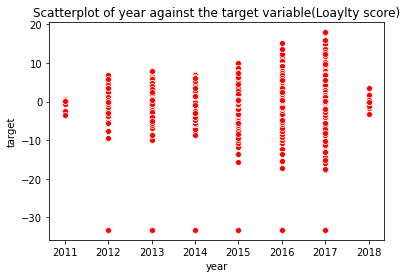

In [99]:
#plotting a scatter plot to check if can see some relation
sns.scatterplot(x=train_all['year'], y=train_all['target'], color='red')
plt.title('Scatterplot of year against the target variable(Loaylty score)')
plt.show()

From this plot it looks like we have outliners in every year the recent years have wide range of loyalty score as compared to earlier years

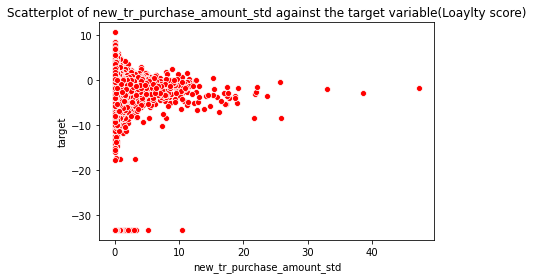

In [100]:
#plotting a scatter plot to check if can see some relation
sns.scatterplot(x=train_all['new_tr_purchase_amount_std'], y=train_all['target'], color='red')
plt.title('Scatterplot of new_tr_purchase_amount_std against the target variable(Loaylty score)')
plt.show()

Here we can se that the lower the value of new_tr_purchase_amount_std is more the negative loyalty score points can be seen

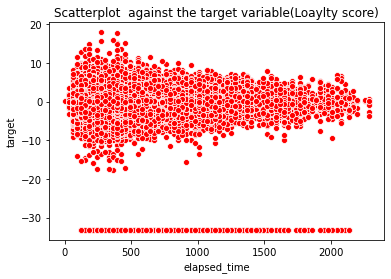

In [101]:
sns.scatterplot(x=train_nt_ht['elapsed_time'], y=train_nt_ht['target'], color='red')
plt.title('Scatterplot  against the target variable(Loaylty score)')
plt.show()

As the elapsed_time increasing we can see more number of points getting closer to 0

Creating more fearures based on date

In [150]:
train_all['all_trans_purchase_date_max'] = pd.to_datetime(train_all['all_trans_purchase_date_max'])
train_all['all_trans_purchase_date_min'] = pd.to_datetime(train_all['all_trans_purchase_date_min'])
train_all['all_time_diff'] = (train_all['all_trans_purchase_date_max'].dt.date - train_all['all_trans_purchase_date_min'].dt.date).dt.days

In [151]:
test_all['all_trans_purchase_date_max'] = pd.to_datetime(test_all['all_trans_purchase_date_max'])
test_all['all_trans_purchase_date_min'] = pd.to_datetime(test_all['all_trans_purchase_date_min'])
test_all['all_time_diff'] = (test_all['all_trans_purchase_date_max'].dt.date - test_all['all_trans_purchase_date_min'].dt.date).dt.days

In [152]:
train_all['transactions_total'] = train_all['all_transactions_count'] + train_all['new_transactions_count']
test_all['transactions_total'] = test_all['all_transactions_count'] + test_all['new_transactions_count']

In [153]:
train_all['avg_all_card_use'] = train_all['all_time_diff']/train_all['all_transactions_count']
test_all['avg_all_card_use'] = test_all['all_time_diff']/test_all['all_transactions_count']

In [154]:
train_all['avg_new_card_use'] = train_all['new_time_diff']/train_all['new_transactions_count']
test_all['avg_new_card_use'] = test_all['new_time_diff']/test_all['new_transactions_count']

In [155]:
train_all['total_diff'] = train_all['new_time_diff'] + train_all['all_time_diff']
test_all['total_diff'] = test_all['new_time_diff']+test_all['all_time_diff']

In [156]:
train_all['total_avg'] = train_all['total_diff'] / train_all['transactions_total']
test_all['total_avg'] = test_all['total_diff']/test_all['transactions_total']

In [157]:
test_all['first_active_month'].head()

0   2017-04-01
1   2017-01-01
2   2017-08-01
3   2017-12-01
4   2015-12-01
Name: first_active_month, dtype: datetime64[ns]

In [158]:
train_all['first_active_month'] = pd.to_datetime(train_all['first_active_month'])
# test_all['first_active_month'] = pd.to_datetime(test_all['first_active_month'])
test_all['first_active_month'] = pd.to_datetime(test_all['first_active_month'], errors='coerce')

In [159]:
train_all['first_active_month'] = pd.to_datetime(train_all['first_active_month'])
train_all['diff_btw_first_last'] = (train_all['all_trans_purchase_date_max'].dt.date - train_all['first_active_month'].dt.date).dt.days

test_all['first_active_month'] = pd.to_datetime(test_all['first_active_month'])
test_all['diff_btw_first_last'] = (test_all['all_trans_purchase_date_max'].dt.date - test_all['first_active_month'].dt.date).dt.days

Creating more features from the set of features which are present in new and history transactions 

In [160]:
train_all['total_purchase_sum'] = train_all['new_tr_purchase_amount_sum'] + train_all['all_trans_purchase_amount_sum']
test_all['total_purchase_sum'] = test_all['new_tr_purchase_amount_sum'] + test_all['all_trans_purchase_amount_sum']

In [161]:
train_all['total_install_sum'] = train_all['all_trans_installments_sum'] + train_all['new_tr_installments_sum']
test_all['total_install_sum'] = test_all['all_trans_installments_sum'] + test_all['new_tr_installments_sum']

In [162]:
train_all['total_month_lag_mean'] = train_all['all_trans_month_lag_mean'] + train_all['new_tr_month_lag_mean']
test_all['total_month_lag_mean'] = test_all['all_trans_month_lag_mean'] + test_all['new_tr_month_lag_mean']

In [163]:
train_all['hist_first_buy'] = (train_all['all_trans_purchase_date_min'].dt.date - train_all['first_active_month'].dt.date).dt.days
test_all['hist_first_buy'] = (test_all['all_trans_purchase_date_min'].dt.date - test_all['first_active_month'].dt.date).dt.days

In [164]:
train_all['total_month_lag_min'] = train_all['all_trans_month_lag_min'] + train_all['new_tr_month_lag_min']
test_all['total_month_lag_min'] = test_all['all_trans_month_lag_min'] + test_all['new_tr_month_lag_min']

In [165]:
train_all['total_month_lag_max'] = train_all['all_trans_month_lag_max'] + train_all['new_tr_month_lag_max']
test_all['total_month_lag_max'] = test_all['all_trans_month_lag_max'] + test_all['new_tr_month_lag_max']

In [166]:
train_all['total_install_max'] = train_all['all_trans_installments_max'] + train_all['new_tr_installments_max']
test_all['total_install_max'] = test_all['all_trans_installments_max'] + test_all['new_tr_installments_max']

In [167]:
train_all['total_install_min'] = train_all['all_trans_installments_min'] + train_all['new_tr_installments_min']
test_all['total_install_min'] = test_all['all_trans_installments_min'] + test_all['new_tr_installments_min']

In [168]:
train_all['total_install_ratio'] = train_all['all_trans_installments_sum'] / train_all['new_tr_installments_sum']
test_all['total_install_ratio'] = test_all['all_trans_installments_sum'] / test_all['new_tr_installments_sum']

In [169]:
train_all['total_install_mean'] = train_all['all_trans_installments_mean'] + train_all['new_tr_installments_mean']
test_all['total_install_mean'] = test_all['all_trans_installments_mean'] + test_all['new_tr_installments_mean']

In [170]:
train_all['total_purchase_max'] = train_all['new_tr_purchase_amount_max'] + train_all['all_trans_purchase_amount_max']
test_all['total_purchase_max'] = test_all['new_tr_purchase_amount_max'] + test_all['all_trans_purchase_amount_max']

In [171]:
train_all['total_purchase_min'] = train_all['new_tr_purchase_amount_min'] + train_all['all_trans_purchase_amount_min']
test_all['total_purchase_min'] = test_all['new_tr_purchase_amount_min'] + test_all['all_trans_purchase_amount_min']

In [172]:
train_all['total_purchase_mean'] = train_all['new_tr_purchase_amount_mean'] + train_all['all_trans_purchase_amount_mean']
test_all['total_purchase_mean'] = test_all['new_tr_purchase_amount_mean'] + test_all['all_trans_purchase_amount_mean']

In [173]:
train_all['total_purchase_ratio'] = train_all['new_tr_purchase_amount_sum'] / train_all['all_trans_purchase_amount_sum']
test_all['total_purchase_ratio'] = test_all['new_tr_purchase_amount_sum'] / test_all['all_trans_purchase_amount_sum']

In [174]:
train_all['active_purchase_lag_mean'] = train_all['all_trans_avg_purchases_lag3_mean'] + train_all['all_trans_avg_purchases_lag12_mean'] + train_all['all_trans_avg_purchases_lag6_mean']
test_all['active_purchase_lag_mean']  = test_all['all_trans_avg_purchases_lag3_mean'] + test_all['all_trans_avg_purchases_lag12_mean'] + test_all['all_trans_avg_purchases_lag6_mean']

In [175]:
train_all['active_sales_lag_max'] = train_all['all_trans_avg_sales_lag3_max'] + train_all['all_trans_avg_sales_lag12_max'] + train_all['all_trans_avg_sales_lag6_max']
test_all['active_sales_lag_max']  = test_all['all_trans_avg_sales_lag3_max'] + test_all['all_trans_avg_sales_lag12_max'] + test_all['all_trans_avg_sales_lag6_max']

In [176]:
train_all['active_sales_lag_min'] = train_all['all_trans_avg_sales_lag3_min'] + train_all['all_trans_avg_sales_lag12_min'] + train_all['all_trans_avg_sales_lag6_min']
test_all['active_sales_lag_min']  = test_all['all_trans_avg_sales_lag3_min'] + test_all['all_trans_avg_sales_lag12_min'] + test_all['all_trans_avg_sales_lag6_min']

In [177]:
train_all['active_sales_lag_mean'] = train_all['all_trans_avg_sales_lag3_mean'] + train_all['all_trans_avg_sales_lag12_mean'] + train_all['all_trans_avg_sales_lag6_mean']
test_all['active_sales_lag_mean']  = test_all['all_trans_avg_sales_lag3_mean'] + test_all['all_trans_avg_sales_lag12_mean'] + test_all['all_trans_avg_sales_lag6_mean']

In [178]:
train_all['price_total'] = train_all['total_purchase_sum'] / train_all['total_install_sum']
train_all['price_mean'] = train_all['total_purchase_mean'] / train_all['total_install_mean']
train_all['price_max'] = train_all['total_purchase_max'] / train_all['total_install_max']

test_all['price_total'] = test_all['total_purchase_sum'] / test_all['total_install_sum']
test_all['price_mean'] = test_all['total_purchase_mean'] / test_all['total_install_mean']
test_all['price_max'] = test_all['total_purchase_max'] / test_all['total_install_max']

In [179]:
train_all['new_tr_purchase_date_max'] = pd.to_datetime(train_all['new_tr_purchase_date_max'],errors='coerce')
train_all['new_tr_year_max'] = train_all['new_tr_purchase_date_max'].dt.year
train_all['new_tr_month_max'] = train_all['new_tr_purchase_date_max'].dt.month
train_all['new_tr_dayofweek_max'] = train_all['new_tr_purchase_date_max'].dt.dayofweek
train_all['new_tr_dayofyear_max'] = train_all['new_tr_purchase_date_max'].dt.dayofyear
train_all['new_tr_week_max'] = train_all['new_tr_purchase_date_max'].dt.week

test_all['new_tr_purchase_date_max'] = pd.to_datetime(test_all['new_tr_purchase_date_max'],errors='coerce')
test_all['new_tr_year_max'] = test_all['new_tr_purchase_date_max'].dt.year
test_all['new_tr_month_max'] = test_all['new_tr_purchase_date_max'].dt.month
test_all['new_tr_dayofweek_max'] = test_all['new_tr_purchase_date_max'].dt.dayofweek
test_all['new_tr_dayofyear_max'] = test_all['new_tr_purchase_date_max'].dt.dayofyear
test_all['new_tr_week_max'] = test_all['new_tr_purchase_date_max'].dt.week 

In [180]:
train_all['new_tr_purchase_date_min'] = pd.to_datetime(train_all['new_tr_purchase_date_min'],errors='coerce')
train_all['new_tr_year_min'] = train_all['new_tr_purchase_date_max'].dt.year
train_all['new_tr_month_min'] = train_all['new_tr_purchase_date_max'].dt.month
train_all['new_tr_dayofweek_min'] = train_all['new_tr_purchase_date_max'].dt.dayofweek
train_all['new_tr_dayofyear_min'] = train_all['new_tr_purchase_date_max'].dt.dayofyear
train_all['new_tr_week_min'] = train_all['new_tr_purchase_date_max'].dt.week 

test_all['new_tr_purchase_date_min'] = pd.to_datetime(test_all['new_tr_purchase_date_min'],errors='coerce')
test_all['new_tr_year_min'] = test_all['new_tr_purchase_date_min'].dt.year
test_all['new_tr_month_min'] = test_all['new_tr_purchase_date_min'].dt.month
test_all['new_tr_dayofweek_min'] = test_all['new_tr_purchase_date_min'].dt.dayofweek
test_all['new_tr_dayofyear_min'] = test_all['new_tr_purchase_date_min'].dt.dayofyear
test_all['new_tr_week_min'] = test_all['new_tr_purchase_date_min'].dt.week 

In [181]:
train_all['all_trans_purchase_date_min'] = pd.to_datetime(train_all['all_trans_purchase_date_min'],errors='coerce')
train_all['all_tr_year_min'] = train_all['all_trans_purchase_date_min'].dt.year
train_all['all_tr_month_min'] = train_all['all_trans_purchase_date_min'].dt.month
train_all['all_tr_dayofweek_min'] = train_all['all_trans_purchase_date_min'].dt.dayofweek
train_all['all_tr_dayofyear_min'] = train_all['all_trans_purchase_date_min'].dt.dayofyear
train_all['all_tr_week_min'] = train_all['all_trans_purchase_date_min'].dt.week 

test_all['all_trans_purchase_date_min'] = pd.to_datetime(test_all['all_trans_purchase_date_min'],errors='coerce')
test_all['all_tr_year_min'] = test_all['all_trans_purchase_date_min'].dt.year
test_all['all_tr_month_min'] = test_all['all_trans_purchase_date_min'].dt.month
test_all['all_tr_dayofweek_min'] = test_all['all_trans_purchase_date_min'].dt.dayofweek
test_all['all_tr_dayofyear_min'] = test_all['all_trans_purchase_date_min'].dt.dayofyear
test_all['all_tr_week_min'] = test_all['all_trans_purchase_date_min'].dt.week 

In [182]:
train_all['all_trans_purchase_date_max'] = pd.to_datetime(train_all['all_trans_purchase_date_max'],errors='coerce')
train_all['all_tr_year_max'] = train_all['all_trans_purchase_date_max'].dt.year
train_all['all_tr_month_max'] = train_all['all_trans_purchase_date_max'].dt.month
train_all['all_tr_dayofweek_max'] = train_all['all_trans_purchase_date_max'].dt.dayofweek
train_all['all_tr_dayofyear_max'] = train_all['all_trans_purchase_date_max'].dt.dayofyear
train_all['all_tr_week_max'] = train_all['all_trans_purchase_date_max'].dt.week 

test_all['all_trans_purchase_date_max'] = pd.to_datetime(test_all['all_trans_purchase_date_max'],errors='coerce')
test_all['all_tr_year_max'] = test_all['all_trans_purchase_date_max'].dt.year
test_all['all_tr_month_max'] = test_all['all_trans_purchase_date_max'].dt.month
test_all['all_tr_dayofweek_max'] = test_all['all_trans_purchase_date_max'].dt.dayofweek
test_all['all_tr_dayofyear_max'] = test_all['all_trans_purchase_date_max'].dt.dayofyear
test_all['all_tr_week_max'] = test_all['all_trans_purchase_date_max'].dt.week 

In [185]:
train_all.fillna(0,inplace=True)
test_all.fillna(0,inplace=True)

In [186]:
train_all.replace([np.inf, -np.inf], 0, inplace=True)
test_all.replace([np.inf, -np.inf], 0, inplace=True)

In [187]:
corr = train_all.corr()
print(corr["target"].sort_values(ascending=False))

target                               1.000000
all_tr_year_max                      0.132301
all_trans_h_duration_min             0.079726
all_trans_h_Mothers_Day_2018_var     0.076690
all_trans_h_Mothers_Day_2018_mean    0.062772
                                       ...   
all_tr_dayofyear_max                -0.134844
all_tr_week_max                     -0.134905
all_trans_active_months_lag3_max          NaN
all_trans_active_months_lag6_max          NaN
all_tr_year_min                           NaN
Name: target, Length: 321, dtype: float64


In [188]:
train_all.to_pickle("train_all.pkl")
test_all.to_pickle("test_all.pkl")

In [2]:
train_all = pd.read_pickle('train_all.pkl')
test_all = pd.read_pickle('test_all.pkl')

In [3]:
train_all.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,year,month,dayofweek,dayofyear,...,all_tr_year_min,all_tr_month_min,all_tr_dayofweek_min,all_tr_dayofyear_min,all_tr_week_min,all_tr_year_max,all_tr_month_max,all_tr_dayofweek_max,all_tr_dayofyear_max,all_tr_week_max
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820312,2017,6,3,152,...,2017,6,1,178,26,2018,2,6,56,8
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392822,2017,1,6,1,...,2017,1,4,6,1,2018,1,2,31,5
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.687988,2016,8,0,214,...,2017,1,2,11,2,2018,2,1,58,9
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142456,2017,9,4,244,...,2017,9,1,269,39,2018,2,2,59,9
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159790,2017,11,2,305,...,2017,11,6,316,45,2018,2,2,59,9


Creating X and Y to fit in model from the final test_all and train_all

In [4]:
# seleting the features and removing features which are of date type
y = train_all['target'].values
X = train_all.drop(columns=['target','card_id','first_active_month','new_tr_purchase_date_max','new_tr_purchase_date_min','all_trans_purchase_date_max','all_trans_purchase_date_min']).values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 33)

Creating LGBM regressor and performing hyper-parameter tunning on the model

In [ ]:
param_grid = {
    'num_leaves': list(range(60, 150, 15)),
    'min_data_in_leaf': [90, 100, 110,120,130,140],
    'min_child_samples': [20,25,30],
    'max_depth': [8, 12, 16, 20,-1],
    'learning_rate': [0.1, 0.01, 0.005],
    'feature_fraction': [0.7,0.8,0.9],
    'bagging_freq': [1,3, 4, 5, 6, 7],
    'bagging_fraction': np.linspace(0.6, 0.95, 10),
    'lambda_l1':[0.1,0.01,0.2],
    'reg_alpha': np.linspace(0.1, 0.95, 10),
    'reg_lambda': np.linspace(0.1, 0.95, 10),
    'n_estimators': [200, 400,600]
}

model = LGBMRegressor(metric='rmse',objective='regression',nthread=-1,boosting_type='rf')

clf_1 = RandomizedSearchCV(model, param_grid, cv=10, scoring='neg_root_mean_squared_error',return_train_score=True)
clf_1.fit(X_train,y_train)

best_params_lgbm = clf_1.best_params_



In [8]:
model_1 = LGBMRegressor(learning_rate= best_params_lgbm['learning_rate'],bagging_fraction=best_params_lgbm['bagging_fraction'],
                        reg_alpha=best_params_lgbm['reg_alpha'],num_leaves =best_params_lgbm['num_leaves'],
                        min_data_in_leaf =best_params_lgbm['min_data_in_leaf'],max_depth =best_params_lgbm['max_depth'],
                        reg_lambda=best_params_lgbm['reg_lambda'],bagging_freq=best_params_lgbm['bagging_freq'],metric='rmse',
                        feature_fraction=best_params_lgbm['feature_fraction'],lambda_l1=best_params_lgbm['lambda_l1'])


model_1.fit(X_train,y_train)

pred = model_1.predict(X_test)

rms = sqrt(mean_squared_error(y_test, pred))
print(rms)

3.6831172858215147


Creating new variable for outliners to see if can improve performance of model

In [9]:
train_all_out = train_all.copy()
train_all_out['outliers'] = 0
train_all_out.loc[train_all['target'] < -10, 'outliers'] = 1

In [10]:
y_out = train_all_out['target'].values
X_out = train_all_out.drop(columns=['target','card_id','first_active_month','new_tr_purchase_date_max','new_tr_purchase_date_min','all_trans_purchase_date_max','all_trans_purchase_date_min']).values

In [11]:
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_out, y_out, random_state = 0)

Creating LGBM regressor and performing hyper-parameter tunning on the model with outliner feature

In [12]:
param_grid = {
    'num_leaves': list(range(8, 92, 4)),
    'min_data_in_leaf': [10, 20, 40, 60, 100],
    'max_depth': [3, 4, 5, 6, 8, 12, 16, 20],
    'learning_rate': [0.1, 0.05, 0.01, 0.005],
    'bagging_freq': [3, 4, 5, 6, 7],
    'bagging_fraction': np.linspace(0.6, 0.95, 10),
    'reg_alpha': np.linspace(0.1, 0.95, 10),
    'reg_lambda': np.linspace(0.1, 0.95, 10),
    'n_estimators': [200, 400,600]
}

model = LGBMRegressor()

clf_1 = RandomizedSearchCV(model, param_grid, cv=20, scoring='neg_root_mean_squared_error',return_train_score=True)
clf_1.fit(X_train_o,y_train_o)

best_params_lgbm_o = clf_1.best_params_

model_2 = LGBMRegressor(learning_rate= best_params_lgbm_o['learning_rate'],bagging_fraction=best_params_lgbm_o['bagging_fraction'],
                        reg_alpha=best_params_lgbm_o['reg_alpha'],num_leaves =best_params_lgbm_o['num_leaves'],
                        min_data_in_leaf =best_params_lgbm_o['min_data_in_leaf'],max_depth =best_params_lgbm_o['max_depth'],
                        reg_lambda=best_params_lgbm_o['reg_lambda'],bagging_freq=best_params_lgbm_o['bagging_freq'],metric='rmse')


model_2.fit(X_train_o,y_train_o)

pred = model_2.predict(X_test_o)

rms = sqrt(mean_squared_error(y_test_o, pred))
print(rms)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.6777777777777778, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6777777777777778
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.6777777777777778, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6777777777777778
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.6777777777777778, subsample=1.0 will be ignored. Current value: bagging_fract

As we saw the error reduced my a large margin if we use outliner as a feature so we will create a binary model which will predict the outliner for test data

In [13]:
y_m = train_all_out['outliers'].values
X_m = train_all_out.drop(columns=['target','card_id','outliers', 'first_active_month','new_tr_purchase_date_max','new_tr_purchase_date_min','all_trans_purchase_date_max','all_trans_purchase_date_min']).values

In [14]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_m, y_m, random_state = 0)

In [15]:
# as the number of points for outliner are less we are under sampling 
import imblearn
rus = imblearn.under_sampling.RandomUnderSampler(sampling_strategy=.8)
X_rus, y_rus = rus.fit_resample(X_train_m, y_train_m)
print(X_rus.shape, y_rus.shape)
print(y_rus)

(3816, 320) (3816,)
[0 0 0 ... 1 1 1]


Performing XGBClassifier model with hyper-parameter tuning to predict a point is outliner or not 

In [16]:
param_grid = {
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3], 
    'n_estimators' : [50, 75, 100, 125]
}

xb1 = XGBClassifier(tree_method = 'gpu_hist', gpu_id=0)
clf = RandomizedSearchCV(xb1, param_grid, cv=20, scoring='f1',return_train_score=True)
clf.fit(X_rus,y_rus)

RandomizedSearchCV(cv=20,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=0, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                            

In [17]:
best_params = clf.best_params_
xb1 = XGBClassifier(tree_method = 'gpu_hist', gpu_id=0,learning_rate=best_params['learning_rate'],n_estimators=best_params['n_estimators'])

In [18]:
xb1.fit(X_rus,y_rus)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan,
              monotone_constraints='(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [19]:
pred = xb1.predict(X_test_m)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test_m, pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91     49913
           1       0.05      0.77      0.09       567

    accuracy                           0.83     50480
   macro avg       0.52      0.80      0.50     50480
weighted avg       0.99      0.83      0.90     50480



In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_m, pred)

array([[41493,  8420],
       [  128,   439]], dtype=int64)

In [22]:
final_test = test_all.drop(columns=['card_id','first_active_month','new_tr_purchase_date_max','new_tr_purchase_date_min','all_trans_purchase_date_max','all_trans_purchase_date_min']).values

In [23]:
out_test = xb1.predict(final_test)

Performing LGBMClassifier model with hyper-parameter tuning to predict a point is outliner or not 

In [26]:
from lightgbm import LGBMClassifier
param_grid = {
    'n_estimators': [200, 400,600], 
    'num_leaves':list(range(8, 92, 4)),
    'feature_fraction' : [0.8, 0.9],
    'min_data_in_leaf': [10, 20, 40, 60, 100],
    'max_depth': [4,8, 12, 16, 20,-1],
    'learning_rate': [0.1, 0.05, 0.01, 0.001],
    'reg_alpha': np.linspace(0.1, 0.95, 10),
    'bagging_freq': [3, 4, 5, 6, 7],
    'bagging_fraction': np.linspace(0.6, 0.95, 10),
    'reg_lambda': np.linspace(0.1, 0.95, 10)
}

lbgm = LGBMClassifier()
clf = RandomizedSearchCV(xb1, param_grid, cv=20, scoring='f1',return_train_score=True)
clf.fit(X_rus,y_rus)

best_params = clf.best_params_
lbgm = LGBMClassifier(num_leaves=best_params['num_leaves'],n_estimators=best_params['n_estimators'],
                     feature_fraction=best_params['feature_fraction'],min_data_in_leaf=best_params['min_data_in_leaf'],
                     max_depth=best_params['max_depth'],learning_rate=best_params['learning_rate'],
                     bagging_freq=best_params['bagging_freq'],bagging_fraction=best_params['bagging_fraction'],
                     reg_alpha=best_params['reg_alpha'],reg_lambda=best_params['reg_lambda'])



[15:00:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { bagging_fraction, bagging_freq, feature_fraction, min_data_in_leaf, num_leaves } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:00:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { bagging_fraction, bagging_freq, feature_fraction, min_data_in_leaf, num_leaves } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:00:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\lea

C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\krishna\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 824, in fit
    callbacks=callbacks)
  File "C:\Users\krishna\Anaconda3\lib\site-packages\xgboost\training.py", line 212, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "C:\Users\krishna\Anaconda3\lib\site-packages\xgboost\training.py", line 75, in _train_internal
    bst.update(dtrain, i, obj)
  File "C:\Users\krishna\Anaconda3\lib\site-packages\xgboost\core.py", line 1369, in update
    dtrain.handle))
  File "C:\Users\krishna\Anaconda3\lib\site-packages\xgboost\core.py", l

[15:53:16] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { bagging_fraction, bagging_freq, feature_fraction, min_data_in_leaf, num_leaves } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:53:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { bagging_fraction, bagging_freq, feature_fraction, min_data_in_leaf, num_leaves } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:53:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\lea

In [27]:
lbgm.fit(X_rus,y_rus)
pred = lbgm.predict(X_test_m)
print(classification_report(y_test_m, pred))
print(confusion_matrix(y_test_m, pred))

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8333333333333333, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8333333333333333
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
              precision    recall  f1-score   support

           0       1.00      0.83      0.91     49913
           1       0.05      0.77      0.09       567

    accuracy                           0.83     50480
   macro avg       0.52      0.80      0.50     50480
weighted avg       0.99      0.83      0.90     50480

[[41559  8354]
 [  128   439]]


In [28]:
out_test_lgbm = lbgm.predict(final_test)

Consider only points which are predicted outliner by both the models

In [29]:
df = pd.DataFrame()
df['model1'] = out_test
df['model2'] = out_test_lgbm

In [30]:
df.model1.value_counts()

0    101826
1     21797
Name: model1, dtype: int64

In [31]:
df.model2.value_counts()

0    102026
1     21597
Name: model2, dtype: int64

In [32]:
df['final'] = df['model1'] + df['model2']

In [33]:
df['target'] = 0

In [34]:
df.loc[df['final'] > 1, 'target'] = 1

In [35]:
out_test = df.target.values

In [36]:
test_all = pd.read_pickle('test_all.pkl')

In [37]:
test_all['outliers'] = out_test

In [38]:
test_all.shape

(123623, 327)

In [39]:
test_all.fillna(0,inplace=True)
test_all.replace([np.inf, -np.inf], 0, inplace=True)

In [40]:
test_all.to_pickle('test_all_outliner.pkl')

In [56]:
final_test = test_all.drop(columns=['card_id','first_active_month','new_tr_purchase_date_max','new_tr_purchase_date_min','all_trans_purchase_date_max','all_trans_purchase_date_min']).values
final_test_out = test_all.drop(columns=['card_id','outliers','first_active_month','new_tr_purchase_date_max','new_tr_purchase_date_min','all_trans_purchase_date_max','all_trans_purchase_date_min']).values

Creating model for Linear regression with L1 and L2 regularizer

In [7]:
from sklearn.linear_model import ElasticNet

parameters = {'alpha': [0.1,0.3,0.5,0.7,0.9],'l1_ratio':[0.1,0.3,0.5,0.7,0.9]}

en = ElasticNet()

clf = RandomizedSearchCV(en, parameters,cv=10, scoring='neg_root_mean_squared_error',return_train_score=True, n_jobs=-1)
clf.fit(X_train,y_train)

C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1083443.620376189, tolerance: 226.390649578765
  positive)


RandomizedSearchCV(cv=10, estimator=ElasticNet(), n_jobs=-1,
                   param_distributions={'alpha': [0.1, 0.3, 0.5, 0.7, 0.9],
                                        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]},
                   return_train_score=True,
                   scoring='neg_root_mean_squared_error')

In [8]:
best_params_en = clf.best_params_

In [9]:
model_en = ElasticNet(alpha= best_params_en['alpha'],l1_ratio = best_params_en['l1_ratio'])

In [10]:
model_en.fit(X_train,y_train)

C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1083443.620376189, tolerance: 226.390649578765
  positive)


ElasticNet(alpha=0.3, l1_ratio=0.1)

In [11]:
pred = model_en.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, pred))
print(rmse)

3.778766786161649


Creating model for Linear regression with L1 and L2 regularizer with outliner features

In [25]:
parameters = {'alpha': [0.1,0.3,0.5,0.7,0.9],'l1_ratio':[0.1,0.3,0.5,0.7,0.9]}

en = ElasticNet()

clf = RandomizedSearchCV(en, parameters,cv=10, scoring='neg_root_mean_squared_error',return_train_score=True, n_jobs=-1)
clf.fit(X_train_o,y_train_o)
best_params_en_o = clf.best_params_
model_en_o = ElasticNet(alpha= best_params_en_o['alpha'],l1_ratio = best_params_en_o['l1_ratio'])
model_en_o.fit(X_train_o,y_train_o)
pred = model_en_o.predict(X_test_o)
rmse = sqrt(mean_squared_error(y_test_o, pred))
print(rmse)

C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1096072.6078795192, tolerance: 224.90272119558125
  positive)
C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1096072.6078795192, tolerance: 224.90272119558125
  positive)


3.7902283514327926


Creating SGD Regressor and performing hyper-parameter tunning 

In [12]:
from sklearn.linear_model import SGDRegressor

parameters = {'penalty': ['l1','l2','elasticnet'],'learning_rate':['invscaling','optimal','constant']}

sgd = SGDRegressor()

clf = RandomizedSearchCV(sgd, parameters,cv=10, scoring='neg_root_mean_squared_error',return_train_score=True, n_jobs=-1)
clf.fit(X_train,y_train)

best_params_sgd = clf.best_params_

model = SGDRegressor(penalty= best_params_sgd['penalty'],learning_rate = best_params_sgd['learning_rate'],n_iter_no_change=9000,max_iter=5000000)


model.fit(X_train,y_train)
pred = model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, pred))
print(rmse)

C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


1.2629283275626014e+28


Creating Decision Tree model and performing hyper-parameter tuning

In [13]:
from sklearn.tree import DecisionTreeRegressor

param_grid = {"min_samples_split": [10, 20, 40],
              "max_depth": [6, 8, 10, 12],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100]
             }
model = DecisionTreeRegressor()

clf = RandomizedSearchCV(model, param_grid,cv=10, scoring='neg_root_mean_squared_error',return_train_score=True, n_jobs=-1)
clf.fit(X_train,y_train)

best_params_dtr = clf.best_params_

dtr = DecisionTreeRegressor(min_samples_split= best_params_dtr['min_samples_split'],max_depth = best_params_dtr['max_depth'],min_samples_leaf = best_params_dtr['min_samples_leaf'],max_leaf_nodes = best_params_dtr['max_leaf_nodes'])


dtr.fit(X_train,y_train)
pred = dtr.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, pred))
print(rmse)

3.7060775554389696


Creating Decision Tree model and performing hyper-parameter tuning with outliner feature

In [28]:
from sklearn.tree import DecisionTreeRegressor

param_grid = {"min_samples_split": [10, 20, 40],
              "max_depth": [6, 8, 10, 12],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100]
             }
model = DecisionTreeRegressor()

clf = RandomizedSearchCV(model, param_grid,cv=10, scoring='neg_root_mean_squared_error',return_train_score=True, n_jobs=-1)
clf.fit(X_train_o,y_train_o)

best_params_dtr_o = clf.best_params_

dtr_o = DecisionTreeRegressor(min_samples_split= best_params_dtr_o['min_samples_split'],max_depth = best_params_dtr_o['max_depth'],min_samples_leaf = best_params_dtr_o['min_samples_leaf'],max_leaf_nodes = best_params_dtr_o['max_leaf_nodes'])


dtr_o.fit(X_train_o,y_train_o)
pred = dtr_o.predict(X_test_o)
rmse = sqrt(mean_squared_error(y_test_o, pred))
print(rmse)


1.593197244209849


Creating Ada boost model and performing hyper-parameter tuning 

In [14]:
from sklearn.ensemble import AdaBoostRegressor

param_grid = {
    'n_estimators': [50, 75, 100],
    'learning_rate' : [0.01,0.1,0.3,1],
    'loss' : ['square', 'exponential']
    }

model = AdaBoostRegressor()

clf = RandomizedSearchCV(model, param_grid,cv=5, scoring='neg_root_mean_squared_error',return_train_score=True, n_jobs=-1)
clf.fit(X_train,y_train)

best_params_ada = clf.best_params_

ada = AdaBoostRegressor(n_estimators= best_params_ada['n_estimators'],learning_rate = best_params_ada['learning_rate'],loss = best_params_ada['loss'])


ada.fit(X_train,y_train)
pred = ada.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, pred))
print(rmse) 


3.7269912403273437


Creating Ada boost model and performing hyper-parameter tuning with outliner feature

In [30]:

param_grid = {
    'n_estimators': [50, 75, 100],
    'learning_rate' : [0.01,0.1,0.3,1],
    'loss' : ['square', 'exponential']
    }

model = AdaBoostRegressor()

clf = RandomizedSearchCV(model, param_grid,cv=5, scoring='neg_root_mean_squared_error',return_train_score=True, n_jobs=-1)
clf.fit(X_train_o,y_train_o)

best_params_ada_o = clf.best_params_

ada_o = AdaBoostRegressor(n_estimators= best_params_ada_o['n_estimators'],learning_rate = best_params_ada_o['learning_rate'],loss = best_params_ada_o['loss'])


ada_o.fit(X_train_o,y_train_o)
pred = ada_o.predict(X_test_o)
rmse = sqrt(mean_squared_error(y_test_o, pred))
print(rmse)

1.6306770711424232


Creating Xgb regressor model and performing hyper-parameter tuning 

In [15]:
learning_rate = [ 0.01, 0.1,0.15, 0.2,0.25, 0.3] 
n_estimators=[50,60,65,70, 75,80,85, 100]
min_child_weight = [6,8,9,10,11,12]
subsample=[0.7,0.8,0.9,0.95,0.99,1]
reg_alpha=[0, 0.001, 0.005, 0.01, 0.05, 0.1]

parameters = {'learning_rate':learning_rate,'n_estimators':n_estimators,'min_child_weight':min_child_weight,'subsample':subsample,'reg_alpha':reg_alpha}
xb1 = XGBRegressor(tree_method = 'gpu_hist', gpu_id=0)
clf_1 = RandomizedSearchCV(xb1, parameters, cv=10, scoring='neg_root_mean_squared_error',return_train_score=True)
clf_1.fit(X_train,y_train)
best_params_xgb = clf_1.best_params_

xgb = XGBRegressor(learning_rate = best_params_xgb['learning_rate'],n_estimators = best_params_xgb['n_estimators'],min_child_weight=best_params_xgb['min_child_weight'],subsample= best_params_xgb['subsample'],reg_alpha = best_params_xgb['reg_alpha'],gpu_id=0,tree_method = 'gpu_hist')
xgb.fit(X_train,y_train)

pred = xgb.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, pred))
print(rmse)

3.6501076773868677


Creating XGB regressor model and performing hyper-parameter tuning with outliner feature

In [32]:
learning_rate = [ 0.01, 0.1,0.15, 0.2,0.25, 0.3] 
n_estimators=[50,60,65,70, 75,80,85, 100]
min_child_weight = [6,8,9,10,11,12]
subsample=[0.7,0.8,0.9,0.95,0.99,1]
reg_alpha=[0, 0.001, 0.005, 0.01, 0.05, 0.1]

parameters = {'learning_rate':learning_rate,'n_estimators':n_estimators,'min_child_weight':min_child_weight,'subsample':subsample,'reg_alpha':reg_alpha}
xb1 = XGBRegressor(tree_method = 'gpu_hist', gpu_id=0)
clf_1 = RandomizedSearchCV(xb1, parameters, cv=10, scoring='neg_root_mean_squared_error',return_train_score=True)
clf_1.fit(X_train_o,y_train_o)
best_params_xgb_o = clf_1.best_params_

xgb_o = XGBRegressor(learning_rate = best_params_xgb_o['learning_rate'],n_estimators = best_params_xgb_o['n_estimators'],min_child_weight=best_params_xgb_o['min_child_weight'],subsample= best_params_xgb_o['subsample'],reg_alpha = best_params_xgb_o['reg_alpha'],gpu_id=0,tree_method = 'gpu_hist')
xgb_o.fit(X_train_o,y_train_o)

pred = xgb_o.predict(X_test_o)
rmse = sqrt(mean_squared_error(y_test_o, pred))
print(rmse)

1.554238042708256


Creating Bayesian model and performing hyper-parameter tuning 

In [16]:
from sklearn import linear_model



param_grid = {
    'n_iter': [500,1000,2000],
    'alpha_1' : [0.001,0.01,0.1,0.3,1],
    'alpha_2' : [0.001,0.01,0.1,0.3,1],
    'lambda_1' : [0.001,0.01,0.1,0.3,1],
    'lambda_2' : [0.001,0.01,0.1,0.3,1]
    }

model = linear_model.BayesianRidge()

clf = RandomizedSearchCV(model, param_grid,cv=5, scoring='neg_root_mean_squared_error',return_train_score=True, n_jobs=-1)
clf.fit(X_train,y_train)

best_params_br = clf.best_params_

br = linear_model.BayesianRidge(n_iter= best_params_br['n_iter'],alpha_1 = best_params_br['alpha_1'],alpha_2 = best_params_br['alpha_2'],lambda_1 = best_params_br['lambda_1'],lambda_2 = best_params_br['lambda_2'])


br.fit(X_train,y_train)
pred = br.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, pred))
print(rmse)


3.7402949666454823


Creating bayesian model and performing hyper-parameter tuning with outliner feature

In [34]:
from sklearn import linear_model



param_grid = {
    'n_iter': [500,1000,2000],
    'alpha_1' : [0.001,0.01,0.1,0.3,1],
    'alpha_2' : [0.001,0.01,0.1,0.3,1],
    'lambda_1' : [0.001,0.01,0.1,0.3,1],
    'lambda_2' : [0.001,0.01,0.1,0.3,1]
    }

model = linear_model.BayesianRidge()

clf = RandomizedSearchCV(model, param_grid,cv=5, scoring='neg_root_mean_squared_error',return_train_score=True, n_jobs=-1)
clf.fit(X_train_o,y_train_o)

best_params_br_o = clf.best_params_

br_o = linear_model.BayesianRidge(n_iter= best_params_br_o['n_iter'],alpha_1 = best_params_br_o['alpha_1'],alpha_2 = best_params_br_o['alpha_2'],lambda_1 = best_params_br_o['lambda_1'],lambda_2 = best_params_br_o['lambda_2'])


br_o.fit(X_train_o,y_train_o)
pred = br_o.predict(X_test_o)
rmse = sqrt(mean_squared_error(y_test_o, pred))
print(rmse)


1.5993641916243255


Creating varible which will predict the testing output for the test.csv file

In [72]:
final_test_out = test_all.drop(columns=['card_id','first_active_month','new_tr_purchase_date_max','new_tr_purchase_date_min','all_trans_purchase_date_max','all_trans_purchase_date_min']).values
final_test = test_all.drop(columns=['card_id','outliers','first_active_month','new_tr_purchase_date_max','new_tr_purchase_date_min','all_trans_purchase_date_max','all_trans_purchase_date_min']).values

Predicting values with every model

In [73]:
br_o_r = br_o.predict(final_test_out)
br_r = br.predict(final_test)

xgb_o_r = xgb_o.predict(final_test_out)
xgb_r = xgb.predict(final_test)

ada_o_r = ada_o.predict(final_test_out)
ada_r = ada.predict(final_test)

dtr_o_r = dtr_o.predict(final_test_out)
dtr_r = dtr.predict(final_test)

model_en_o_r = model_en_o.predict(final_test_out)
model_en_r = model_en.predict(final_test)

Creting a data frame to store the result of predicted values with their respected card Id

In [74]:
df = pd.read_csv('test.csv')
submission = df[['card_id']]
submission['br_o_r'] = br_o_r
submission['br_r'] = br_r

submission['xgb_o_r'] = xgb_o_r
submission['xgb_r'] = xgb_r

submission['ada_o_r'] = ada_o_r
submission['ada_r'] = ada_r

submission['dtr_o_r'] = dtr_o_r
submission['dtr_r'] = dtr_r

submission['model_en_o_r'] = model_en_o_r
submission['model_en_r'] = model_en_r


C:\Users\krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [75]:
submission.to_pickle("target.pkl")

In [17]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from matplotlib import pyplot

Creating stacking regressor model with  hyper-parameter tunned models

In [18]:
level0 = list()
level0.append(('en', ElasticNet(alpha= best_params_en['alpha'],l1_ratio = best_params_en['l1_ratio'])))
level0.append(('br', linear_model.BayesianRidge(n_iter= best_params_br['n_iter'],alpha_1 = best_params_br['alpha_1'],alpha_2 = best_params_br['alpha_2'],lambda_1 = best_params_br['lambda_1'],lambda_2 = best_params_br['lambda_2'])))
level0.append(('dtr', DecisionTreeRegressor(min_samples_split= best_params_dtr['min_samples_split'],max_depth = best_params_dtr['max_depth'],min_samples_leaf = best_params_dtr['min_samples_leaf'],max_leaf_nodes = best_params_dtr['max_leaf_nodes'])))
level0.append(('ada', AdaBoostRegressor(n_estimators= best_params_ada['n_estimators'],learning_rate = best_params_ada['learning_rate'],loss = best_params_ada['loss'])))
level0.append(('xgb', XGBRegressor(learning_rate = best_params_xgb['learning_rate'],n_estimators = best_params_xgb['n_estimators'],min_child_weight=best_params_xgb['min_child_weight'],subsample= best_params_xgb['subsample'],reg_alpha = best_params_xgb['reg_alpha'])))
# define meta learner model
level1 = LGBMRegressor(learning_rate= best_params_lgbm['learning_rate'],bagging_fraction=best_params_lgbm['bagging_fraction'],
                       reg_alpha=best_params_lgbm['reg_alpha'],num_leaves =best_params_lgbm['num_leaves'],
                       min_data_in_leaf =best_params_lgbm['min_data_in_leaf'],max_depth =best_params_lgbm['max_depth'],
                       reg_lambda=best_params_lgbm['reg_lambda'],bagging_freq=best_params_lgbm['bagging_freq'],metric='rmse')
# define the stacking ensemble
f_model = StackingRegressor(estimators=level0, final_estimator=level1, cv=10)
# fit the model on all available data
f_model.fit(X_train, y_train)
# make a prediction 
yhat = f_model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, yhat))
print(rmse)

C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1083443.620376189, tolerance: 226.390649578765
  positive)
C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 963046.9493537602, tolerance: 201.18117438479075
  positive)
C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 974732.3553838358, tolerance: 203.7087790016957
  positive)
C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

[LightGBM] [Warning] min_data_in_leaf is set=140, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=140
[LightGBM] [Warning] bagging_fraction is set=0.8722222222222222, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8722222222222222
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
3.664839674032196


Creating stacking regressor model with  hyper-parameter tunned models with outliner feature

In [78]:
level0 = list()
level0.append(('en', ElasticNet(alpha= best_params_en_o['alpha'],l1_ratio = best_params_en_o['l1_ratio'])))
level0.append(('br', linear_model.BayesianRidge(n_iter= best_params_br_o['n_iter'],alpha_1 = best_params_br_o['alpha_1'],alpha_2 = best_params_br_o['alpha_2'],lambda_1 = best_params_br_o['lambda_1'],lambda_2 = best_params_br['lambda_2'])))
level0.append(('dtr', DecisionTreeRegressor(min_samples_split= best_params_dtr_o['min_samples_split'],max_depth = best_params_dtr_o['max_depth'],min_samples_leaf = best_params_dtr_o['min_samples_leaf'],max_leaf_nodes = best_params_dtr_o['max_leaf_nodes'])))
level0.append(('ada', AdaBoostRegressor(n_estimators= best_params_ada['n_estimators'],learning_rate = best_params_ada_o['learning_rate'],loss = best_params_ada_o['loss'])))
level0.append(('xgb', XGBRegressor(learning_rate = best_params_xgb_o['learning_rate'],n_estimators = best_params_xgb_o['n_estimators'],min_child_weight=best_params_xgb_o['min_child_weight'],subsample= best_params_xgb_o['subsample'],reg_alpha = best_params_xgb_o['reg_alpha'],gpu_id=0,tree_method = 'gpu_hist')))
# define meta learner model
level1 = LGBMRegressor(learning_rate= best_params_lgbm_o['learning_rate'],bagging_fraction=best_params_lgbm_o['bagging_fraction'],
                        reg_alpha=best_params_lgbm_o['reg_alpha'],num_leaves =best_params_lgbm_o['num_leaves'],
                        min_data_in_leaf =best_params_lgbm_o['min_data_in_leaf'],max_depth =best_params_lgbm_o['max_depth'],
                        reg_lambda=best_params_lgbm_o['reg_lambda'],bagging_freq=best_params_lgbm_o['bagging_freq'],metric='rmse')
# define the stacking ensemble
f_model_o = StackingRegressor(estimators=level0, final_estimator=level1, cv=8)
# fit the model on all available data
f_model_o.fit(X_train_o, y_train_o)
# make a prediction 
yhat = f_model_o.predict(X_test_o)
rmse = sqrt(mean_squared_error(y_test_o, yhat))
print(rmse)

C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 993365.1851247031, tolerance: 224.90272119558125
  positive)
C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 867513.4599036118, tolerance: 196.3356294855271
  positive)
C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 866826.3498980346, tolerance: 196.12935009137306
  positive)
C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] bagging_fraction is set=0.95, subsample=1.0 will be ignored. Current value: bagging_fraction=0.95
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
1.5547978267610942


In [79]:
result = f_model_o.predict(final_test_out)

In [80]:
result_o = f_model.predict(final_test)

In [81]:
submission['stacking'] = result_o
submission['stacking_o'] = result

In [83]:
submission.to_pickle("target.pkl")

Considering their are no outliner in test and giving 0 to every outliner

In [84]:
test_all['outliers'] = 0

In [90]:
final_test_temp = test_all.drop(columns=['card_id','first_active_month','new_tr_purchase_date_max','new_tr_purchase_date_min','all_trans_purchase_date_max','all_trans_purchase_date_min']).values

In [91]:
temp_out = f_model_o.predict(final_test_temp)

In [92]:
submission['temp_out'] = temp_out

Creating Out of fold model with  hyper-parameter tunned models 

In [19]:
from math import sqrt
from numpy import hstack
from numpy import vstack
from numpy import asarray
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
 
# create a list of base-models
def get_models():
    models = list()
    models.append(LinearRegression())
    models.append(ElasticNet(alpha= best_params_en['alpha'],l1_ratio = best_params_en['l1_ratio']))
    models.append(linear_model.BayesianRidge(n_iter= best_params_br['n_iter'],alpha_1 = best_params_br['alpha_1'],alpha_2 = best_params_br['alpha_2'],lambda_1 = best_params_br['lambda_1'],lambda_2 = best_params_br['lambda_2']))
    models.append(DecisionTreeRegressor(min_samples_split= best_params_dtr['min_samples_split'],max_depth = best_params_dtr['max_depth'],min_samples_leaf = best_params_dtr['min_samples_leaf'],max_leaf_nodes = best_params_dtr['max_leaf_nodes']))
    models.append(XGBRegressor(learning_rate = best_params_xgb['learning_rate'],n_estimators = best_params_xgb['n_estimators'],min_child_weight=best_params_xgb['min_child_weight'],subsample= best_params_xgb['subsample'],reg_alpha = best_params_xgb['reg_alpha']))
    models.append(AdaBoostRegressor(n_estimators= best_params_ada['n_estimators'],learning_rate = best_params_ada['learning_rate'],loss = best_params_ada['loss']))
    models.append(BaggingRegressor(n_estimators=10))
    models.append(RandomForestRegressor(n_estimators=10))
    models.append(ExtraTreesRegressor(n_estimators=10))
    models.append(LGBMRegressor(learning_rate= best_params_lgbm['learning_rate'],bagging_fraction=best_params_lgbm['bagging_fraction'],reg_alpha=best_params_lgbm['reg_alpha'],num_leaves =best_params_lgbm['num_leaves'],min_data_in_leaf =best_params_lgbm['min_data_in_leaf'],max_depth =best_params_lgbm['max_depth'],reg_lambda=best_params_lgbm['reg_lambda'],bagging_freq=best_params_lgbm['bagging_freq'],metric='rmse'))
    return models
 
# collect out of fold predictions form k-fold cross validation
def get_out_of_fold_predictions(X, y, models):
    meta_X, meta_y = list(), list()
    # define split of data
    kfold = KFold(n_splits=20, shuffle=True)
    # enumerate splits
    for train_ix, test_ix in kfold.split(X):
        fold_yhats = list()
        # get data
        train_X, test_X = X[train_ix], X[test_ix]
        train_y, test_y = y[train_ix], y[test_ix]
        meta_y.extend(test_y)
        # fit and make predictions with each sub-model
        for model in models:
            model.fit(train_X, train_y)
            yhat = model.predict(test_X)
            # store columns
            fold_yhats.append(yhat.reshape(len(yhat),1))
        # store fold yhats as columns
        meta_X.append(hstack(fold_yhats))
    return vstack(meta_X), asarray(meta_y)
 
# fit all base models on the training dataset
def fit_base_models(X, y, models):
    for model in models:
        model.fit(X, y)

# fit a meta model
def fit_meta_model(X, y):
    model = ElasticNet()
    model.fit(X, y)
    return model
 
# evaluate a list of models on a dataset
def evaluate_models(X, y, models):
    for model in models:
        yhat = model.predict(X)
        mse = mean_squared_error(y, yhat)
        print('%s: RMSE %.3f' % (model.__class__.__name__, sqrt(mse)))

# make predictions with stacked model
def super_learner_predictions(X, models, meta_model):
    meta_X = list()
    for model in models:
        yhat = model.predict(X)
        meta_X.append(yhat.reshape(len(yhat),1))
    meta_X = hstack(meta_X)
    # predict
    return meta_model.predict(meta_X)
 

models = get_models()
# get out of fold predictions
meta_X, meta_y = get_out_of_fold_predictions(X_train, y_train, models)
print('Meta ', meta_X.shape, meta_y.shape)
# fit base models
fit_base_models(X_train, y_train, models)
# fit the meta model
meta_model = fit_meta_model(meta_X, meta_y)
# evaluate base models
evaluate_models(X_test, y_test, models)
# evaluate meta model
yhat = super_learner_predictions(X_test, models, meta_model)
print('Super Learner: RMSE %.3f' % (sqrt(mean_squared_error(y_test, yhat))))

C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1027910.016048406, tolerance: 214.81769880411514
  positive)


[LightGBM] [Warning] min_data_in_leaf is set=140, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=140
[LightGBM] [Warning] bagging_fraction is set=0.8722222222222222, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8722222222222222
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1028341.734835623, tolerance: 214.86106669502175
  positive)


[LightGBM] [Warning] min_data_in_leaf is set=140, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=140
[LightGBM] [Warning] bagging_fraction is set=0.8722222222222222, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8722222222222222
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1028066.8167800317, tolerance: 214.7607729524388
  positive)


[LightGBM] [Warning] min_data_in_leaf is set=140, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=140
[LightGBM] [Warning] bagging_fraction is set=0.8722222222222222, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8722222222222222
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1030719.5298464347, tolerance: 215.3929861907167
  positive)


[LightGBM] [Warning] min_data_in_leaf is set=140, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=140
[LightGBM] [Warning] bagging_fraction is set=0.8722222222222222, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8722222222222222
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1034399.0484804828, tolerance: 216.1179324447671
  positive)


[LightGBM] [Warning] min_data_in_leaf is set=140, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=140
[LightGBM] [Warning] bagging_fraction is set=0.8722222222222222, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8722222222222222
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1019802.2895177675, tolerance: 213.05606776855225
  positive)


[LightGBM] [Warning] min_data_in_leaf is set=140, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=140
[LightGBM] [Warning] bagging_fraction is set=0.8722222222222222, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8722222222222222
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1026465.6211066679, tolerance: 214.46725826861962
  positive)


[LightGBM] [Warning] min_data_in_leaf is set=140, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=140
[LightGBM] [Warning] bagging_fraction is set=0.8722222222222222, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8722222222222222
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1035692.0438792561, tolerance: 216.56061588817286
  positive)


[LightGBM] [Warning] min_data_in_leaf is set=140, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=140
[LightGBM] [Warning] bagging_fraction is set=0.8722222222222222, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8722222222222222
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1032284.6727322227, tolerance: 215.76493520922523
  positive)


[LightGBM] [Warning] min_data_in_leaf is set=140, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=140
[LightGBM] [Warning] bagging_fraction is set=0.8722222222222222, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8722222222222222
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1027245.6605040927, tolerance: 214.62251265743947
  positive)


[LightGBM] [Warning] min_data_in_leaf is set=140, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=140
[LightGBM] [Warning] bagging_fraction is set=0.8722222222222222, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8722222222222222
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1031900.763342582, tolerance: 215.53810720208708
  positive)


[LightGBM] [Warning] min_data_in_leaf is set=140, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=140
[LightGBM] [Warning] bagging_fraction is set=0.8722222222222222, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8722222222222222
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1038202.3048599215, tolerance: 217.09699145424608
  positive)


[LightGBM] [Warning] min_data_in_leaf is set=140, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=140
[LightGBM] [Warning] bagging_fraction is set=0.8722222222222222, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8722222222222222
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1025264.2974604941, tolerance: 214.29650509800305
  positive)


[LightGBM] [Warning] min_data_in_leaf is set=140, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=140
[LightGBM] [Warning] bagging_fraction is set=0.8722222222222222, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8722222222222222
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1028038.8265407867, tolerance: 214.83960732501524
  positive)


[LightGBM] [Warning] min_data_in_leaf is set=140, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=140
[LightGBM] [Warning] bagging_fraction is set=0.8722222222222222, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8722222222222222
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1027525.7754783656, tolerance: 214.74790503628617
  positive)


[LightGBM] [Warning] min_data_in_leaf is set=140, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=140
[LightGBM] [Warning] bagging_fraction is set=0.8722222222222222, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8722222222222222
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1030550.3083988307, tolerance: 215.24659179588878
  positive)


[LightGBM] [Warning] min_data_in_leaf is set=140, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=140
[LightGBM] [Warning] bagging_fraction is set=0.8722222222222222, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8722222222222222
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1027098.198391915, tolerance: 214.5815692693714
  positive)


[LightGBM] [Warning] min_data_in_leaf is set=140, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=140
[LightGBM] [Warning] bagging_fraction is set=0.8722222222222222, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8722222222222222
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1028238.7783281069, tolerance: 214.90186540186426
  positive)


[LightGBM] [Warning] min_data_in_leaf is set=140, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=140
[LightGBM] [Warning] bagging_fraction is set=0.8722222222222222, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8722222222222222
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1025118.7357180219, tolerance: 214.27619090661216
  positive)


[LightGBM] [Warning] min_data_in_leaf is set=140, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=140
[LightGBM] [Warning] bagging_fraction is set=0.8722222222222222, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8722222222222222
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1031380.9738834011, tolerance: 215.47402428769848
  positive)


[LightGBM] [Warning] min_data_in_leaf is set=140, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=140
[LightGBM] [Warning] bagging_fraction is set=0.8722222222222222, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8722222222222222
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
Meta  (151437, 10) (151437,)


C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1083443.620376189, tolerance: 226.390649578765
  positive)


[LightGBM] [Warning] min_data_in_leaf is set=140, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=140
[LightGBM] [Warning] bagging_fraction is set=0.8722222222222222, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8722222222222222
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
LinearRegression: RMSE 3.693
ElasticNet: RMSE 3.779
BayesianRidge: RMSE 3.740
DecisionTreeRegressor: RMSE 3.706
XGBRegressor: RMSE 3.649
AdaBoostRegressor: RMSE 3.735
BaggingRegressor: RMSE 3.937
RandomForestRegressor: RMSE 3.947
ExtraTreesRegressor: RMSE 3.893
LGBMRegressor: RMSE 3.674
Super Learner: RMSE 3.678


In [35]:
def fit_meta_model(X, y):
    model = XGBRegressor()
    model.fit(X, y)
    return model

meta_model = fit_meta_model(meta_X, meta_y)
# evaluate base models
evaluate_models(X_test, y_test, models)
# evaluate meta model
yhat = super_learner_predictions(X_test, models, meta_model)
print('Super Learner: RMSE %.3f' % (sqrt(mean_squared_error(y_test, yhat))))

LinearRegression: RMSE 44.520
ElasticNet: RMSE 52.950
BayesianRidge: RMSE 47.298
DecisionTreeRegressor: RMSE 3.700
XGBRegressor: RMSE 3.646
AdaBoostRegressor: RMSE 3.727
BaggingRegressor: RMSE 3.921
RandomForestRegressor: RMSE 3.917
ExtraTreesRegressor: RMSE 3.895
LGBMRegressor: RMSE 3.674
Super Learner: RMSE 3.762


In [36]:
def fit_meta_model(X, y):
    model = LGBMRegressor()
    model.fit(X, y)
    return model

meta_model = fit_meta_model(meta_X, meta_y)
# evaluate base models
evaluate_models(X_test, y_test, models)
# evaluate meta model
yhat = super_learner_predictions(X_test, models, meta_model)
print('Super Learner: RMSE %.3f' % (sqrt(mean_squared_error(y_test, yhat))))

LinearRegression: RMSE 44.520
ElasticNet: RMSE 52.950
BayesianRidge: RMSE 47.298
DecisionTreeRegressor: RMSE 3.700
XGBRegressor: RMSE 3.646
AdaBoostRegressor: RMSE 3.727
BaggingRegressor: RMSE 3.921
RandomForestRegressor: RMSE 3.917
ExtraTreesRegressor: RMSE 3.895
LGBMRegressor: RMSE 3.674
Super Learner: RMSE 3.674


Creating Out of fold model without hyper-parameter tunned models 

In [ ]:
from math import sqrt
from numpy import hstack
from numpy import vstack
from numpy import asarray
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

def get_models():
    models = list()
    models.append(LinearRegression())
    models.append(ElasticNet())
    models.append(DecisionTreeRegressor())
    models.append(XGBRegressor())
    models.append(AdaBoostRegressor())
    models.append(BaggingRegressor(n_estimators=10))
    models.append(RandomForestRegressor(n_estimators=10))
    models.append(ExtraTreesRegressor(n_estimators=10))
    models.append(LGBMRegressor(metric='rmse'))
    return models
 
# collect out of fold predictions form k-fold cross validation
def get_out_of_fold_predictions(X, y, models):
    meta_X, meta_y = list(), list()
    # define split of data
    kfold = KFold(n_splits=10, shuffle=True)
    # enumerate splits
    for train_ix, test_ix in kfold.split(X):
        fold_yhats = list()
        # get data
        train_X, test_X = X[train_ix], X[test_ix]
        train_y, test_y = y[train_ix], y[test_ix]
        meta_y.extend(test_y)
        # fit and make predictions with each sub-model
        for model in models:
            model.fit(train_X, train_y)
            yhat = model.predict(test_X)
            # store columns
            fold_yhats.append(yhat.reshape(len(yhat),1))
        # store fold yhats as columns
        meta_X.append(hstack(fold_yhats))
    return vstack(meta_X), asarray(meta_y)
 
# fit all base models on the training dataset
def fit_base_models(X, y, models):
    for model in models:
        model.fit(X, y)

# fit a meta model
def fit_meta_model(X, y):
    model = BayesianRidge()
    model.fit(X, y)
    return model
 
# evaluate a list of models on a dataset
def evaluate_models(X, y, models):
    for model in models:
        yhat = model.predict(X)
        mse = mean_squared_error(y, yhat)
        print('%s: RMSE %.3f' % (model.__class__.__name__, sqrt(mse)))

# make predictions with stacked model
def super_learner_predictions_out(X, models, meta_model):
    meta_X = list()
    for model in models:
        yhat = model.predict(X)
        meta_X.append(yhat.reshape(len(yhat),1))
    meta_X = hstack(meta_X)
    # predict
    return meta_model.predict(meta_X)
 

models = get_models()
# get out of fold predictions
meta_X, meta_y = get_out_of_fold_predictions(X_train, y_train, models)
print('Meta ', meta_X.shape, meta_y.shape)
# fit base models
fit_base_models(X_train, y_train, models)
# fit the meta model
meta_model = fit_meta_model(meta_X, meta_y)
# evaluate base models
evaluate_models(X_test, y_test, models)


In [25]:
yhat_non_out_no_para = super_learner_predictions_out(X_test, models, meta_model)
print('Super Learner: RMSE %.3f' % (sqrt(mean_squared_error(y_test, yhat_non_out_no_para))))

Super Learner: RMSE 3.855


In [76]:

yhat_oof = super_learner_predictions(final_test_out, models, meta_model)


Creating Out of fold model with  hyper-parameter tunned models with outliner feature

In [77]:
 
# create a list of base-models
def get_models():
    models = list()
    models.append(LinearRegression())
    models.append(ElasticNet(alpha= best_params_en_o['alpha'],l1_ratio = best_params_en_o['l1_ratio']))
    models.append(linear_model.BayesianRidge(n_iter= best_params_br_o['n_iter'],alpha_1 = best_params_br_o['alpha_1'],alpha_2 = best_params_br_o['alpha_2'],lambda_1 = best_params_br_o['lambda_1'],lambda_2 = best_params_br_o['lambda_2']))
    models.append(DecisionTreeRegressor(min_samples_split= best_params_dtr_o['min_samples_split'],max_depth = best_params_dtr_o['max_depth'],min_samples_leaf = best_params_dtr_o['min_samples_leaf'],max_leaf_nodes = best_params_dtr_o['max_leaf_nodes']))
    models.append(XGBRegressor(learning_rate = best_params_xgb_o['learning_rate'],n_estimators = best_params_xgb_o['n_estimators'],min_child_weight=best_params_xgb_o['min_child_weight'],subsample= best_params_xgb_o['subsample'],reg_alpha = best_params_xgb_o['reg_alpha'],gpu_id=0,tree_method = 'gpu_hist'))
    models.append(AdaBoostRegressor(n_estimators= best_params_ada_o['n_estimators'],learning_rate = best_params_ada_o['learning_rate'],loss = best_params_ada_o['loss']))
    models.append(BaggingRegressor(n_estimators=10))
    models.append(RandomForestRegressor(n_estimators=10))
    models.append(ExtraTreesRegressor(n_estimators=10))
    models.append(LGBMRegressor(learning_rate= best_params_lgbm_o['learning_rate'],bagging_fraction=best_params_lgbm_o['bagging_fraction'],reg_alpha=best_params_lgbm_o['reg_alpha'],num_leaves =best_params_lgbm_o['num_leaves'],min_data_in_leaf =best_params_lgbm_o['min_data_in_leaf'],max_depth =best_params_lgbm_o['max_depth'],reg_lambda=best_params_lgbm_o['reg_lambda'],bagging_freq=best_params_lgbm_o['bagging_freq'],metric='rmse'))
    return models
 
# collect out of fold predictions form k-fold cross validation
def get_out_of_fold_predictions(X, y, models):
    meta_X, meta_y = list(), list()
    # define split of data
    kfold = KFold(n_splits=10, shuffle=True)
    # enumerate splits
    for train_ix, test_ix in kfold.split(X):
        fold_yhats = list()
        # get data
        train_X, test_X = X[train_ix], X[test_ix]
        train_y, test_y = y[train_ix], y[test_ix]
        meta_y.extend(test_y)
        # fit and make predictions with each sub-model
        for model in models:
            model.fit(train_X, train_y)
            yhat = model.predict(test_X)
            # store columns
            fold_yhats.append(yhat.reshape(len(yhat),1))
        # store fold yhats as columns
        meta_X.append(hstack(fold_yhats))
    return vstack(meta_X), asarray(meta_y)
 
# fit all base models on the training dataset
def fit_base_models(X, y, models):
    for model in models:
        model.fit(X, y)

# fit a meta model
def fit_meta_model(X, y):
    model = LinearRegression()
    model.fit(X, y)
    return model
 
# evaluate a list of models on a dataset
def evaluate_models(X, y, models):
    for model in models:
        yhat = model.predict(X)
        mse = mean_squared_error(y, yhat)
        print('%s: RMSE %.3f' % (model.__class__.__name__, sqrt(mse)))

# make predictions with stacked model
def super_learner_predictions_out(X, models, meta_model):
    meta_X = list()
    for model in models:
        yhat = model.predict(X)
        meta_X.append(yhat.reshape(len(yhat),1))
    meta_X = hstack(meta_X)
    # predict
    return meta_model.predict(meta_X)
 

models = get_models()
# get out of fold predictions
meta_X, meta_y = get_out_of_fold_predictions(X_train_o, y_train_o, models)
print('Meta ', meta_X.shape, meta_y.shape)
# fit base models
fit_base_models(X_train_o, y_train_o, models)
# fit the meta model
meta_model = fit_meta_model(meta_X, meta_y)
# evaluate base models
evaluate_models(X_test_o, y_test_o, models)
# evaluate meta model
yhat = super_learner_predictions_out(X_test_o, models, meta_model)
print('Super Learner: RMSE %.3f' % (sqrt(mean_squared_error(y_test_o, yhat))))

C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 994451.3559277557, tolerance: 204.13538118492397
  positive)


[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 978856.9715615674, tolerance: 200.8376809454645
  positive)


[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 986576.1029607884, tolerance: 202.49483051242174
  positive)


[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 982498.9362816437, tolerance: 201.58477688097267
  positive)


[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 992826.694715264, tolerance: 203.6579347307069
  positive)


[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 985523.1870759464, tolerance: 202.28540224618857
  positive)


[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 984554.5605624662, tolerance: 202.11557545349305
  positive)


[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 989323.1759190705, tolerance: 202.96905704539856
  positive)


[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 989645.3792412402, tolerance: 202.9021656206729
  positive)


[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 979818.2404786986, tolerance: 201.14100415202947
  positive)


[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
Meta  (151437, 10) (151437,)


C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1096072.6078795192, tolerance: 224.90272119558125
  positive)


[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
LinearRegression: RMSE 1.598
ElasticNet: RMSE 3.790
BayesianRidge: RMSE 1.599
DecisionTreeRegressor: RMSE 1.593
XGBRegressor: RMSE 1.554
AdaBoostRegressor: RMSE 1.631
BaggingRegressor: RMSE 1.653
RandomForestRegressor: RMSE 1.651
ExtraTreesRegressor: RMSE 1.653
LGBMRegressor: RMSE 1.554
Super Learner: RMSE 1.551


In [78]:
temp = pd.read_pickle('test_all_outliner.pkl')
final_test = temp.drop(columns=['card_id','first_active_month','new_tr_purchase_date_max','new_tr_purchase_date_min','all_trans_purchase_date_max','all_trans_purchase_date_min']).values
y_hat_with_out = super_learner_predictions_out(final_test, models, meta_model)

In [79]:
target['stack_oof_o'] = y_hat_with_out
target['stack_oof'] = yhat_oof

In [31]:
target.to_pickle('target.pkl')

In [27]:
lbgm_pred = model_1.predict(final_test_temp)

In [28]:
target = pd.read_pickle('target.pkl')

In [29]:
target['lbgm_pred'] = lbgm_pred

Looking at the results of all the models

In [30]:
target.head()

,card_id,br_o_r,br_r,xgb_o_r,xgb_r,ada_o_r,ada_r,dtr_o_r,dtr_r,model_en_o_r,model_en_r,stacking,stacking_o,stack_oof_o,stack_oof,oof_non_out,oof_non_out_nopara,stack_no_out,stack_no_out_para,lbgm_pred
0,C_ID_0ab67a22ab,-33.700006,-2.150192,-33.158463,-3.967904,-33.219281,-2.538394,-33.219281,-2.210368,-5.183550,-1.959440,-2.900542,-33.024661,-33.222214,-3.360535,-0.220527,-0.341691,-0.395160,-0.311781,-1.595954
1,C_ID_130fd0cbdd,-0.630376,-1.209783,-0.250791,-0.199351,-0.200819,-0.228062,-0.231458,-3.204083,-0.965219,-1.018610,-0.233773,-0.283789,-0.296430,-0.335824,-0.252786,-0.207790,-0.282106,-0.129126,-0.203021
2,C_ID_b709037bc5,-0.603817,-1.188017,-0.215734,-1.306369,-0.741702,-0.801687,-0.987153,-1.620944,-0.477401,-0.510554,-1.133542,-0.298779,-0.452169,-1.241228,-0.781512,-0.503496,-0.484446,-0.410551,-0.912625
3,C_ID_d27d835a9f,-0.187282,-0.015526,0.014168,-0.137127,-0.200819,-0.228062,0.006248,-3.204083,-0.254504,-0.227652,-0.178881,-0.013869,-0.084705,0.039719,-0.057083,-0.065306,-0.062662,-0.103893,-0.204388
4,C_ID_2b5e3df5c2,-2.588666,-2.758021,-1.265175,-0.839355,-0.741702,-0.798787,-0.978239,-1.543981,-2.026128,-2.038432,-0.802406,-1.275639,-1.177096,-1.003892,-1.265887,-1.334409,-1.288947,-1.205569,-0.831957


Taking avg of all the models without outliner features and including some models with outliners which gave good result

In [143]:
df['target'] = (target['br_r'] +  target['xgb_r'] +  target['ada_r'] + target['dtr_r'] + target['model_en_r'] + 3 *target['stacking']+3.5 *target['stack_oof']+target['oof_non_out']+target['oof_non_out_nopara']+target['stack_no_out'])/10

C:\Users\krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [112]:
df = target[['card_id']]

In [144]:
df.head()

,card_id,target
0,C_ID_0ab67a22ab,-3.424717
1,C_ID_130fd0cbdd,-0.847928
2,C_ID_b709037bc5,-1.494195
3,C_ID_d27d835a9f,-0.439513
4,C_ID_2b5e3df5c2,-1.778866


Taking features which are important and then creating feature set to train the model

In [29]:
feature_imp_lbgm = pd.DataFrame(sorted(zip(model_1.feature_importances_,train_all.columns)), columns=['Value','Feature'])

In [39]:
cols = feature_imp_lbgm[feature_imp_lbgm.Value > 40]

In [40]:
cols.head()

,Value,Feature
252,42,all_trans_purchase_amount_min
253,42,days_feature1
254,43,all_time_diff
255,43,avg_new_card_use
256,43,new_tr_n_amount_month_ratio_mean


In [41]:
col_name = cols['Feature'].values

In [43]:
df_temp = train_all[col_name]

In [44]:
Imp_x = df_temp.drop(columns=['all_trans_purchase_date_min']).values

In [45]:
imp_y = train_all['target'].values

In [46]:
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(Imp_x, imp_y, random_state = 33)

In [47]:
level0 = list()
level0.append(('en', ElasticNet()))
level0.append(('br', BayesianRidge()))
level0.append(('dtr', DecisionTreeRegressor()))
level0.append(('ada', AdaBoostRegressor()))
level0.append(('xgb', XGBRegressor()))
# define meta learner model
level1 = LGBMRegressor(metric='rmse')
# define the stacking ensemble
f_model_imp_x = StackingRegressor(estimators=level0, final_estimator=level1, cv=10)
# fit the model on all available data
f_model_imp_x.fit(X_train_imp, y_train_imp)
# make a prediction 
yhat = f_model_imp_x.predict(X_test_imp)
rmse = sqrt(mean_squared_error(y_test_imp, yhat))
print(rmse)

3.668890714002883


In [37]:
from math import sqrt
from numpy import hstack
from numpy import vstack
from numpy import asarray
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

def get_models():
    models = list()
    models.append(LinearRegression())
    models.append(ElasticNet())
    models.append(DecisionTreeRegressor())
    models.append(XGBRegressor(gpu_id=0,tree_method = 'gpu_hist'.0))
    models.append(AdaBoostRegressor())
    models.append(BaggingRegressor(n_estimators=10))
    models.append(RandomForestRegressor(n_estimators=10))
    models.append(ExtraTreesRegressor(n_estimators=10))
    models.append(LGBMRegressor(metric='rmse'))
    return models
 
# collect out of fold predictions form k-fold cross validation
def get_out_of_fold_predictions(X, y, models):
    meta_X, meta_y = list(), list()
    # define split of data
    kfold = KFold(n_splits=10, shuffle=True)
    # enumerate splits
    for train_ix, test_ix in kfold.split(X):
        fold_yhats = list()
        # get data
        train_X, test_X = X[train_ix], X[test_ix]
        train_y, test_y = y[train_ix], y[test_ix]
        meta_y.extend(test_y)
        # fit and make predictions with each sub-model
        for model in models:
            model.fit(train_X, train_y)
            yhat = model.predict(test_X)
            # store columns
            fold_yhats.append(yhat.reshape(len(yhat),1))
        # store fold yhats as columns
        meta_X.append(hstack(fold_yhats))
    return vstack(meta_X), asarray(meta_y)
 
# fit all base models on the training dataset
def fit_base_models(X, y, models):
    for model in models:
        model.fit(X, y)

# fit a meta model
def fit_meta_model(X, y):
    model = BayesianRidge()
    model.fit(X, y)
    return model
 
# evaluate a list of models on a dataset
def evaluate_models(X, y, models):
    for model in models:
        yhat = model.predict(X)
        mse = mean_squared_error(y, yhat)
        print('%s: RMSE %.3f' % (model.__class__.__name__, sqrt(mse)))

# make predictions with stacked model
def super_learner_predictions_imp(X, models, meta_model):
    meta_X = list()
    for model in models:
        yhat = model.predict(X)
        meta_X.append(yhat.reshape(len(yhat),1))
    meta_X = hstack(meta_X)
    # predict
    return meta_model.predict(meta_X)
 

models = get_models()
# get out of fold predictions
meta_X, meta_y = get_out_of_fold_predictions(X_train_imp, y_train_imp, models)
print('Meta ', meta_X.shape, meta_y.shape)
# fit base models
fit_base_models(X_train_imp, y_train_imp, models)
# fit the meta model
meta_model = fit_meta_model(meta_X, meta_y)
# evaluate base models
evaluate_models(X_test_imp, y_test_imp, models)
yhat = super_learner_predictions_imp(X_test_imp, models, meta_model)
print('Super Learner: RMSE %.3f' % (sqrt(mean_squared_error(y_test_imp, yhat))))

Meta  (151437, 9) (151437,)
LinearRegression: RMSE 3.756
ElasticNet: RMSE 3.786
DecisionTreeRegressor: RMSE 5.558
XGBRegressor: RMSE 3.723
AdaBoostRegressor: RMSE 7.038
BaggingRegressor: RMSE 3.940
RandomForestRegressor: RMSE 3.924
ExtraTreesRegressor: RMSE 3.946
LGBMRegressor: RMSE 3.679
Super Learner: RMSE 3.667


As we saw there are values which are -33 so we are Adding 33 to the target variable and then creating a model to check to and see if can find any improvement

In [23]:
y_val = train_all['target'] + 33

In [26]:
X_train_sum, X_test_sum, y_train_sum, y_test_sum = train_test_split(X, y_val , random_state = 33)

In [39]:
param_grid = {
    'num_leaves': list(range(60, 150, 15)),
    'min_data_in_leaf': [90, 100, 110,120,130,140],
    'min_child_samples': [20,25,30],
    'max_depth': [8, 12, 16, 20],
    'learning_rate': [0.1, 0.01, 0.005],
    'bagging_freq': [3, 4, 5, 6, 7],
    'bagging_fraction': np.linspace(0.6, 0.95, 10),
    'reg_alpha': np.linspace(0.1, 0.95, 10),
    'reg_lambda': np.linspace(0.1, 0.95, 10),
    'n_estimators': [200, 400,600]
}

model = LGBMRegressor()

clf_1 = RandomizedSearchCV(model, param_grid, cv=10, scoring='neg_root_mean_squared_error',return_train_score=True)
clf_1.fit(X_train_sum,y_train_sum)

best_params_lgbm = clf_1.best_params_

model_1_sum = LGBMRegressor(learning_rate= best_params_lgbm['learning_rate'],bagging_fraction=best_params_lgbm['bagging_fraction'],
                        reg_alpha=best_params_lgbm['reg_alpha'],num_leaves =best_params_lgbm['num_leaves'],
                        min_data_in_leaf =best_params_lgbm['min_data_in_leaf'],max_depth =best_params_lgbm['max_depth'],
                        reg_lambda=best_params_lgbm['reg_lambda'],bagging_freq=best_params_lgbm['bagging_freq'],metric='rmse')


model_1_sum.fit(X_train_sum,y_train_sum)

pred = model_1_sum.predict(X_test_sum)

rms = sqrt(mean_squared_error(y_test_sum, pred))
print(rms)

[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=30 will be ignored. Current value: min_data_in_leaf=120
[LightGBM] [Warning] bagging_fraction is set=0.7944444444444444, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7944444444444444
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=30 will be ignored. Current value: min_data_in_leaf=120
[LightGBM] [Warning] bagging_fraction is set=0.7944444444444444, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7944444444444444
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=30 will be ignored. Current value: min_data_in_leaf=120
[LightGBM] [Warning] bagging_fraction is set=0.7944444444444444, subsample=1.0 will be ignored. Current value: bagging

In [40]:
level0 = list()
level0.append(('en', ElasticNet()))
level0.append(('br', BayesianRidge()))
level0.append(('dtr', DecisionTreeRegressor()))
level0.append(('ada', AdaBoostRegressor()))
level0.append(('xgb', XGBRegressor()))
# define meta learner model
level1 = LGBMRegressor(metric='rmse')
# define the stacking ensemble
f_model_sum_x = StackingRegressor(estimators=level0, final_estimator=level1, cv=10)
# fit the model on all available data
f_model_sum_x.fit(X_train_sum, y_train_sum)
# make a prediction 
yhat = f_model_sum_x.predict(X_test_sum)
rmse = sqrt(mean_squared_error(y_test_sum, yhat))
print(rmse)

C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1103814.5059998874, tolerance: 226.3965036299738
  positive)
C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 981026.5490654014, tolerance: 201.18640175135928
  positive)
C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 992962.9183868956, tolerance: 203.71407084287924
  positive)
C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

3.6652672385429295


In [48]:
from math import sqrt
from numpy import hstack
from numpy import vstack
from numpy import asarray
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

def get_models():
    models = list()
    models.append(LinearRegression())
    models.append(ElasticNet())
    models.append(DecisionTreeRegressor())
    models.append(XGBRegressor(gpu_id=0,tree_method = 'gpu_hist'))
    models.append(AdaBoostRegressor())
    models.append(BaggingRegressor(n_estimators=10))
    models.append(RandomForestRegressor(n_estimators=10))
    models.append(ExtraTreesRegressor(n_estimators=10))
    models.append(LGBMRegressor(metric='rmse'))
    return models
 
# collect out of fold predictions form k-fold cross validation
def get_out_of_fold_predictions(X, y, models):
    meta_X, meta_y = list(), list()
    # define split of data
    kfold = KFold(n_splits=10, shuffle=True)
    # enumerate splits
    for train_ix, test_ix in kfold.split(X):
        fold_yhats = list()
        # get data
        train_X, test_X = X[train_ix], X[test_ix]
        train_y, test_y = y[train_ix], y[test_ix]
        meta_y.extend(test_y)
        # fit and make predictions with each sub-model
        for model in models:
            model.fit(train_X, train_y)
            yhat = model.predict(test_X)
            # store columns
            fold_yhats.append(yhat.reshape(len(yhat),1))
        # store fold yhats as columns
        meta_X.append(hstack(fold_yhats))
    return vstack(meta_X), asarray(meta_y)
 
# fit all base models on the training dataset
def fit_base_models(X, y, models):
    for model in models:
        model.fit(X, y)

# fit a meta model
def fit_meta_model(X, y):
    model = BayesianRidge()
    model.fit(X, y)
    return model
 
# evaluate a list of models on a dataset
def evaluate_models(X, y, models):
    for model in models:
        yhat = model.predict(X)
        mse = mean_squared_error(y, yhat)
        print('%s: RMSE %.3f' % (model.__class__.__name__, sqrt(mse)))

# make predictions with stacked model
def super_learner_predictions_sum(X, models, meta_model):
    meta_X = list()
    for model in models:
        yhat = model.predict(X)
        meta_X.append(yhat.reshape(len(yhat),1))
    meta_X = hstack(meta_X)
    # predict
    return meta_model.predict(meta_X)
 

models = get_models()
# get out of fold predictions
meta_X, meta_y = get_out_of_fold_predictions(X_train, y_train, models)
print('Meta ', meta_X.shape, meta_y.shape)
# fit base models
fit_base_models(X_train, y_train, models)
# fit the meta model
meta_model = fit_meta_model(meta_X, meta_y)
# evaluate base models
evaluate_models(X_test, y_test, models)
yhat = super_learner_predictions_sum(X_test, models, meta_model)
print('Super Learner: RMSE %.3f' % (sqrt(mean_squared_error(y_test, yhat))))

C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 990974.6973120896, tolerance: 203.27211411864093
  positive)
C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 989390.0808979871, tolerance: 202.88049577113543
  positive)
C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 985886.1320161511, tolerance: 202.19496909781304
  positive)
C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

Meta  (151437, 9) (151437,)


C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1103814.5059998874, tolerance: 226.3965036299738
  positive)


LinearRegression: RMSE 44.520
ElasticNet: RMSE 65.731
DecisionTreeRegressor: RMSE 5.565
XGBRegressor: RMSE 3.711
AdaBoostRegressor: RMSE 7.460
BaggingRegressor: RMSE 3.930
RandomForestRegressor: RMSE 3.926
ExtraTreesRegressor: RMSE 3.900
LGBMRegressor: RMSE 3.656
Super Learner: RMSE 23.039


In [49]:
def fit_meta_model(X, y):
    model = XGBRegressor()
    model.fit(X, y)
    return model
meta_model = fit_meta_model(meta_X, meta_y)
# evaluate base models
evaluate_models(X_test, y_test, models)
yhat = super_learner_predictions_sum(X_test, models, meta_model)
print('Super Learner: RMSE %.3f' % (sqrt(mean_squared_error(y_test, yhat))))

LinearRegression: RMSE 44.520
ElasticNet: RMSE 65.731
DecisionTreeRegressor: RMSE 5.565
XGBRegressor: RMSE 3.711
AdaBoostRegressor: RMSE 7.460
BaggingRegressor: RMSE 3.930
RandomForestRegressor: RMSE 3.926
ExtraTreesRegressor: RMSE 3.900
LGBMRegressor: RMSE 3.656
Super Learner: RMSE 3.746


In [58]:
final_test_out = test_all.drop(columns=['card_id','first_active_month','new_tr_purchase_date_max','new_tr_purchase_date_min','all_trans_purchase_date_max','all_trans_purchase_date_min']).values


In [52]:
Tar_sum = f_model_sum_x.predict(final_test_out)

In [53]:
target = pd.read_pickle('target.pkl')

In [54]:
Tar_sum = Tar_sum - 33

In [55]:
target['target_sum'] = Tar_sum

In [56]:
target.head()

,card_id,br_o_r,br_r,xgb_o_r,xgb_r,ada_o_r,ada_r,dtr_o_r,dtr_r,model_en_o_r,...,stacking,stacking_o,stack_oof_o,stack_oof,oof_non_out,oof_non_out_nopara,stack_no_out,stack_no_out_para,lbgm_pred,target_sum
0,C_ID_0ab67a22ab,-33.700006,-2.150192,-33.158463,-3.967904,-33.219281,-2.538394,-33.219281,-2.210368,-5.183550,...,-2.900542,-33.024661,-33.222214,-3.360535,-0.220527,-0.341691,-0.395160,-0.311781,-1.595954,-2.690558
1,C_ID_130fd0cbdd,-0.630376,-1.209783,-0.250791,-0.199351,-0.200819,-0.228062,-0.231458,-3.204083,-0.965219,...,-0.233773,-0.283789,-0.296430,-0.335824,-0.252786,-0.207790,-0.282106,-0.129126,-0.203021,0.042033
2,C_ID_b709037bc5,-0.603817,-1.188017,-0.215734,-1.306369,-0.741702,-0.801687,-0.987153,-1.620944,-0.477401,...,-1.133542,-0.298779,-0.452169,-1.241228,-0.781512,-0.503496,-0.484446,-0.410551,-0.912625,-1.694079
3,C_ID_d27d835a9f,-0.187282,-0.015526,0.014168,-0.137127,-0.200819,-0.228062,0.006248,-3.204083,-0.254504,...,-0.178881,-0.013869,-0.084705,0.039719,-0.057083,-0.065306,-0.062662,-0.103893,-0.204388,-0.083882
4,C_ID_2b5e3df5c2,-2.588666,-2.758021,-1.265175,-0.839355,-0.741702,-0.798787,-0.978239,-1.543981,-2.026128,...,-0.802406,-1.275639,-1.177096,-1.003892,-1.265887,-1.334409,-1.288947,-1.205569,-0.831957,-1.695802


Creating final target by taking 4 best model output

In [125]:
df = target[['card_id','target_sum','stack_oof','stacking','lbgm_pred']]
df.head()

,card_id,target_sum,stack_oof,stacking,lbgm_pred
0,C_ID_0ab67a22ab,-2.690558,-3.360535,-2.900542,-1.595954
1,C_ID_130fd0cbdd,0.042033,-0.335824,-0.233773,-0.203021
2,C_ID_b709037bc5,-1.694079,-1.241228,-1.133542,-0.912625
3,C_ID_d27d835a9f,-0.083882,0.039719,-0.178881,-0.204388
4,C_ID_2b5e3df5c2,-1.695802,-1.003892,-0.802406,-0.831957


In [126]:
df['target'] = (1.2*df['target_sum'] + 1.7* df['stack_oof'] + 1.3* df['stacking'] + 1.3 *df['lbgm_pred'])/4

C:\Users\krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [127]:
df.drop(columns=["target_sum", "stack_oof",'stacking','lbgm_pred'],inplace=True)

In [128]:
df.head()

,card_id,target
0,C_ID_0ab67a22ab,-3.696756
1,C_ID_130fd0cbdd,-0.272074
2,C_ID_b709037bc5,-1.700750
3,C_ID_d27d835a9f,-0.132846
4,C_ID_2b5e3df5c2,-1.466563


The best result we got from all the above modeling is 3.72 so we took the 3 best target values and combining them to get better results

In [129]:
df.to_csv('df.csv',index=False)

In [130]:
xx = pd.read_csv('best1.csv')

In [131]:
yy = pd.read_csv('best2.csv')

In [132]:
zz = pd.read_csv('best3.csv')

In [148]:
df1 = target[['card_id']]

In [143]:
df1['target'] = (0.3*xx['target'] + 0.4*yy['target'] + 0.3*zz['target'])

C:\Users\krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [154]:
df1.to_csv('df1.csv',index=False)

Again the final result we got is a little improvement we got 3.71 from our best 3 files

Now we Try for neural networks to check if they can provide better results

In [89]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras import layers,models,utils,Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,Activation,BatchNormalization
import tensorflow as tf

In [24]:
temp = train_all[train_all['target'] > -20]

In [25]:
y = temp['target'].values
X = temp.drop(columns=['target','card_id','first_active_month','new_tr_purchase_date_max','new_tr_purchase_date_min','all_trans_purchase_date_max','all_trans_purchase_date_min']).values

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 33)

Performing hyper parameter tunning for neural networks

In [87]:
input_dim = X_train.shape[1]
def create_model(optimizer='rmsprop', init='glorot_uniform'):
    model = Sequential()
    model.add(Dense(1024, input_dim=input_dim, kernel_initializer=init, activation='relu'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(512, kernel_initializer=init, activation='relu'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dense(64, kernel_initializer=init, activation='relu'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(10, kernel_initializer=init,activation='relu'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(1, kernel_initializer=init, activation='relu'))

    # compile model
    model.compile(loss='mean_squared_error', 
                  optimizer=optimizer, 
                  metrics=['mean_squared_error'])

    return model

In [90]:
model_init_batch_epoch_CV = KerasRegressor(build_fn=create_model, verbose=1)

# we choose the initializers that came at the top in our previous cross-validation!!
init_mode = ['glorot_uniform', 'uniform'] 
batches = [512,1024]
epochs = [10]

# grid search for initializer, batch size and number of epochs
param_grid = dict(epochs=epochs, batch_size=batches, init=init_mode)
grid = GridSearchCV(estimator=model_init_batch_epoch_CV, 
                    param_grid=param_grid,
                    cv=3)
grid_result = grid.fit(X_train, y_train)

Train on 100958 samples
Epoch 1/10
100958/100958 [==============================] - 6s 55us/sample - loss: 15.2725 - mean_squared_error: 15.2725
Epoch 2/10
100958/100958 [==============================] - 3s 31us/sample - loss: 15.0925 - mean_squared_error: 15.0925
Epoch 3/10
100958/100958 [==============================] - 3s 31us/sample - loss: 15.0833 - mean_squared_error: 15.0833s - loss: 15.1949 - mean_squared_
Epoch 4/10
100958/100958 [==============================] - 3s 31us/sample - loss: 15.0868 - mean_squared_error: 15.0868s - loss: 15.1013 - mean_squared_error:
Epoch 5/10
100958/100958 [==============================] - 3s 31us/sample - loss: 15.0792 - mean_squared_error: 15.0792s - loss: 15.0878 - mean_squared_error: 15.08
Epoch 6/10
100958/100958 [==============================] - 3s 32us/sample - loss: 15.0756 - mean_squared_error: 15.0756
Epoch 7/10
100958/100958 [==============================] - 3s 31us/sample - loss: 15.0737 - mean_squared_error: 15.0736
Epoch 8/10
1

In [29]:
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for -2.946 using {'batch_size': 1024, 'epochs': 10, 'init': 'glorot_uniform'}
mean=-2.958, std=0.05131 using {'batch_size': 512, 'epochs': 10, 'init': 'glorot_uniform'}
mean=-2.958, std=0.04909 using {'batch_size': 512, 'epochs': 10, 'init': 'uniform'}
mean=-2.946, std=0.05645 using {'batch_size': 1024, 'epochs': 10, 'init': 'glorot_uniform'}
mean=-2.954, std=0.05246 using {'batch_size': 1024, 'epochs': 10, 'init': 'uniform'}


In [30]:
def create_model(optimizer='adam', init='glorot_uniform'):
    model = Sequential()
    model.add(Dense(1024, input_dim=input_dim, kernel_initializer=init, activation='relu'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(512, input_dim=input_dim, kernel_initializer=init, activation='relu'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dense(64, input_dim=input_dim, kernel_initializer=init, activation='relu'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(10, kernel_initializer=init, activation=tf.nn.relu))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(1, kernel_initializer=init, activation=tf.nn.relu))

    # compile model
    model.compile(loss='mean_squared_error', 
                  optimizer=optimizer, 
                  metrics=['accuracy'])

    return model

In [31]:
mo = create_model()

In [40]:
mo.fit(X_train,y_train,epochs=20, validation_data=(X_test,y_test))

Train on 149782 samples, validate on 49928 samples
Epoch 1/20
149782/149782 [==============================] - 34s 228us/sample - loss: 2.8197 - accuracy: 0.0023 - val_loss: 3912258422.7750 - val_accuracy: 0.0087
Epoch 2/20
149782/149782 [==============================] - 32s 216us/sample - loss: 2.8198 - accuracy: 0.0027 - val_loss: 9319091247.3137 - val_accuracy: 0.0088
Epoch 3/20
149782/149782 [==============================] - 35s 235us/sample - loss: 2.8157 - accuracy: 0.0026 - val_loss: 130136481.1777 - val_accuracy: 0.0087
Epoch 4/20
149782/149782 [==============================] - 35s 233us/sample - loss: 2.8173 - accuracy: 0.0024 - val_loss: 345881390.9606 - val_accuracy: 0.0087
Epoch 5/20
149782/149782 [==============================] - 35s 237us/sample - loss: 2.8166 - accuracy: 0.0022 - val_loss: 408687692.4500 - val_accuracy: 0.0088
Epoch 6/20
149782/149782 [==============================] - 35s 234us/sample - loss: 2.8146 - accuracy: 0.0027 - val_loss: 2762731513.1106 - v

In [41]:
final_test_out = test_all.drop(columns=['card_id','first_active_month','new_tr_purchase_date_max','new_tr_purchase_date_min','all_trans_purchase_date_max','all_trans_purchase_date_min']).values

In [42]:
result = mo.predict(final_test_out)

We can see that neural networks are not doing very good job as the loss is very high and accuracy is very low

We saw that folds provide better result and LBGM regressor provided good result so performing Kfolds on LBGM

In [46]:
train_all = pd.read_pickle('train_all.pkl')
test_all = pd.read_pickle('test_all.pkl')
test_all_out = pd.read_pickle('test_all_outliner.pkl')

In [47]:
train_all_out = train_all.copy()
train_all_out['outliers'] = 0
train_all_out.loc[train_all['target'] < -30, 'outliers'] = 1

In [48]:
# seleting the features and removing features which are of date type
y = train_all['target']
X = train_all.drop(columns=['target','card_id','first_active_month','new_tr_purchase_date_max','new_tr_purchase_date_min','all_trans_purchase_date_max','all_trans_purchase_date_min'])

In [49]:
# seleting the features and removing features which are of date type
y_o = train_all_out['target']
X_o = train_all_out.drop(columns=['target','card_id','first_active_month','new_tr_purchase_date_max','new_tr_purchase_date_min','all_trans_purchase_date_max','all_trans_purchase_date_min'])

In [50]:
test = test_all.drop(columns=['card_id','first_active_month','new_tr_purchase_date_max','new_tr_purchase_date_min','all_trans_purchase_date_max','all_trans_purchase_date_min']).values
test_o = test_all_out.drop(columns=['card_id','first_active_month','new_tr_purchase_date_max','new_tr_purchase_date_min','all_trans_purchase_date_max','all_trans_purchase_date_min']).values

In [51]:
from sklearn.model_selection import KFold,StratifiedKFold
folds = KFold(n_splits=10, shuffle=True, random_state=15)

In [59]:
#Took help from kaggle to find the best hyper-parameter as mine was not giving the best result
best_params_x = {'num_leaves': 50,
            'boosting_type': 'rf',
             'min_data_in_leaf': 30, 
             'objective':'regression',
             'max_depth': -1,
             'learning_rate': 0.01,
             "min_child_samples": 20,
             "boosting": "gbdt",
             "feature_fraction": 0.9,
             "bagging_freq": 1,
             "bagging_fraction": 0.9 ,
             "bagging_seed": 11,
             "metric": 'rmse',
             "lambda_l1": 0.1,
             "verbosity": -1,
             "nthread": 4,
             "random_state": 33}


In [60]:
valid_score = np.zeros(len(X))
test_score  = np.zeros(len(test))

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X.values, X.values)):
    print('----')
    print("fold n°{}".format(fold_))
    
    x0,y0 = X.iloc[trn_idx], y[trn_idx]
    x1,y1 = X.iloc[val_idx], y[val_idx]
    
    trn_data = lgb.Dataset(x0, label= y0)
    val_data = lgb.Dataset(x1, label= y1)
    
    num_round = 30000
    clf = lgb.train(best_params_x, trn_data, num_round, valid_sets = [trn_data, val_data],verbose_eval=900, early_stopping_rounds = 500)
    valid_score[val_idx] = clf.predict(x1, num_iteration=clf.best_iteration)
        
    test_score += clf.predict(test, num_iteration=clf.best_iteration) / folds.n_splits
    
np.sqrt(mean_squared_error(valid_score, y))


----
fold n°0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=rf will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
Training until validation scores don't improve for 500 rounds
[900]	training's rmse: 3.22351	valid_1's rmse: 3.7146
[1800]	training's rmse: 3.01788	valid_1's rmse: 3.71355
Early stopping, best iteration is:
[1372]	training's rmse: 3.10652	valid_1's rmse: 3.71249
----
fold n°1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=rf will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
Training until validation scores don't improve for 500 rounds
[900]	training's rmse: 3.22295	valid_1's rmse: 3.66664
Early stopping, best iteration is:
[1233]	training's rmse: 3.1364	valid_1's rmse: 3.66548
----
fold n°2
[LightGBM] [Warning] boosting is

3.665910556474236

In [61]:
valid_score = np.zeros(len(X_o))
test_score_o  = np.zeros(len(test_o))

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_o.values, X_o.values)):
    print('----')
    print("fold n°{}".format(fold_))
    
    x0,y0 = X_o.iloc[trn_idx], y_o[trn_idx]
    x1,y1 = X_o.iloc[val_idx], y_o[val_idx]
    
    trn_data = lgb.Dataset(x0, label= y0)
    val_data = lgb.Dataset(x1, label= y1)
    
    num_round = 30000
    clf = lgb.train(best_params_x, trn_data, num_round, valid_sets = [trn_data, val_data], 
                    verbose_eval=900, early_stopping_rounds = 500)
    valid_score[val_idx] = clf.predict(x1, num_iteration=clf.best_iteration)
    
    # feature_importance_df[:, fold_] = clf.feature_importance()
    
    test_score_o += clf.predict(test_o, num_iteration=clf.best_iteration) / folds.n_splits
    
np.sqrt(mean_squared_error(valid_score, y_o))


----
fold n°0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=rf will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
Training until validation scores don't improve for 500 rounds
[900]	training's rmse: 1.49397	valid_1's rmse: 1.52704
[1800]	training's rmse: 1.44285	valid_1's rmse: 1.52588
Early stopping, best iteration is:
[2040]	training's rmse: 1.43051	valid_1's rmse: 1.52565
----
fold n°1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=rf will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
Training until validation scores don't improve for 500 rounds
[900]	training's rmse: 1.49071	valid_1's rmse: 1.56157
[1800]	training's rmse: 1.4395	valid_1's rmse: 1.5604
[2700]	training's rmse: 1.39578	valid_1's rmse: 1.55976
[3600]	training's rmse: 1

1.5512652798740767

Above we created 2 kfolds LBGM models and merging their result and adding outlier varible to see what the model predicted

In [82]:
s = pd.DataFrame()
id_test = test_all['card_id'].values
so = pd.DataFrame()
id_test_o = test_all['card_id'].values

s['card_id']  = id_test
s['target1']  = mfull * 1.12
so['card_id'] = id_test_o
so['target2']  = mfull_o *1.12

ids = test_all_out[['card_id','outliers']]
temp = pd.merge(so,ids,on='card_id',how='left')
final = pd.merge(s,temp,on='card_id',how='left')
final.head()


,card_id,target1,target2,outliers
0,C_ID_0ab67a22ab,-3.154124,-36.811526,1
1,C_ID_130fd0cbdd,-0.326668,-0.210400,0
2,C_ID_b709037bc5,-1.250757,-0.952863,0
3,C_ID_d27d835a9f,-0.244283,-0.222731,0
4,C_ID_2b5e3df5c2,-0.905028,-0.919965,0


Now we are taking result from target1 when the point is outlier and taking result from target2 when the point is not outlier to created final target values

In [83]:
ll=[]
for index, row in final.iterrows():
    if row['outliers']>0:
        ll.append(row['target1'])
    else:
        ll.append(row['target2'])

In [84]:
sub = pd.DataFrame()
id_test = final['card_id'].values

sub['card_id']  = id_test
sub['target']  = ll

In [85]:
sub.head()

,card_id,target
0,C_ID_0ab67a22ab,-3.154124
1,C_ID_130fd0cbdd,-0.210400
2,C_ID_b709037bc5,-0.952863
3,C_ID_d27d835a9f,-0.222731
4,C_ID_2b5e3df5c2,-0.919965


In [86]:
sub.to_csv('sub.csv', index = False)

The above final target gave us the result of 3.707 